In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('cscpopendata.csv')

**OBJECTIVE: I was hired by a customer who wants to create a one-stop, multi-beauty brands store and they want to know if chemical in the products they are selling matter?**

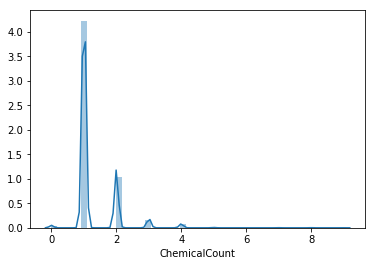

In [494]:
sns.distplot(data.ChemicalCount.dropna())
plt.show()

In [3]:
#data.info()

In [4]:
#data.isna().sum()

In [5]:
#data.nunique()

#INITIAL OBSERVATIONS
#CDPHId is the product id. The unique count is the number of products that has been input in the category
#BUT NOTE THAT a product may appear more than once in the data set if a product has more than one Color/Scent/Flavor, 
#more than one Category, or more than one Chemical Name/CAS number reported.

#CPHId & productname unique counts are different - find out why

#CSF&CSFId, from looking at the data set csfid and csf unique counts are different because csf sometimes are general names
#for example 0, black, etc, which and be the same for other brands but shouldnt be a problem for now

#Company Id and Company Name counts are different - find out why, need to choose which one to go by
#There are 592 unique company names - if choose to use company name, should standardize first

In [6]:
#data.head(60)

In [7]:
#data.tail()

In [8]:
#data.dtypes

In [9]:
data['InitialDateReported'] = data['InitialDateReported'].astype('datetime64')
data['MostRecentDateReported'] = data['MostRecentDateReported'].astype('datetime64')
data['DiscontinuedDate'] = data['DiscontinuedDate'].astype('datetime64')
data['ChemicalCreatedAt'] = data['ChemicalCreatedAt'].astype('datetime64')
data['ChemicalUpdatedAt'] = data['ChemicalUpdatedAt'].astype('datetime64')
data['ChemicalDateRemoved'] = data['ChemicalDateRemoved'].astype('datetime64')
data['CDPHId'] = data['CDPHId'].astype('str')
data['PrimaryCategoryId'] = data['PrimaryCategoryId'].astype('str')
data['CompanyId'] = data['CompanyId'].astype('str')

THINGS to do 

1. standardize column CompanyName X DONE/ ProductName / CSF/ ChemicalName data and create a new column for it !? 
    - convert company's name to all lower case
    - replace punctuations like , and . with ''
    - replace ' '  with ''
    - replace '""' and "''"

2. drop unneccessary columns X DONE
    - csfid
    - casnumber
    - casid
    - chemical id
    - company id
    - subcategory id

3. Change data type from Object to Date x DONE
    - InitialDate
    - MostRecentdate
    - chemical discountinue 
    - chemical created at
    - chemical updated at
    - chemical date removed

4. create a Product column that combine ProductName + CSF so we can now differentiate different color/scent as different products -*Should i do this tho? should I consider them as different products? X DONT DO IT
Questions
- do i treat same product, different csf as different products from the company? - I think i should
- but for the same product that has identical info except the chemical - i should combine it. How tho? covert chemical name column to list?

5. after that for products with same cdphid, make new column as chemical list and combine all chemicals
**let's not do this, just group by the product before graphing/ analyzing it 

6. create cleaned dataframe
create 2 dfs
one for the cleaned data 
and the other one, groupby either CDHPId or Product Name
IDEAL DF X DONE
    - CDPH ID
    - csf
    - Product name
    - Company Name
    - Brand name
    - primary category id - might need
    - Primary Category
    - Sub category
    - Chemical Name
    - Initial Date Reported
    - Most Recent Date Reported
    - chemical discontinued - can be used to find out the proportion of discontinue/ continue
    - chemicalcreated at
    - chemical updated at
    - chemical date removed - see company that's most remove the chemical
    - chemical count 

Things I want to find out
- Category with most frequent report chemicals x done
- subcat with most report chemicals
- most used chemical
- Company with most reported chemical products
- company, category with most chemical count
- mean chemical count 

In [10]:
#data.PrimaryCategory.value_counts()

In [11]:
# com = data[['CompanyId','CompanyName']].drop_duplicates()
# com.sort_values(['CompanyName']).head(60)

#from this table, it shows exact same name has different ids for example Added Extras LLC has 716, 157, 118.
#let's use company name and drop company's id and we will standardize the companyname column 

In [12]:
#data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='716'] #18 rows brand name include wal-mart, glee, hot topic

In [13]:
#data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='157'] #193 rows - Hot Topic,etc

In [14]:
#data[data.CompanyName== 'Added Extras LLC'][data.CompanyId =='118']['BrandName'].unique() #87rows

In [15]:
cdata = data[['CDPHId','ProductName','CSF','CompanyName', 'BrandName','PrimaryCategoryId','PrimaryCategory', 'SubCategory','ChemicalName','ChemicalCount','InitialDateReported','MostRecentDateReported','DiscontinuedDate', 'ChemicalCreatedAt','ChemicalUpdatedAt','ChemicalDateRemoved']]

In [16]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107512 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    107512 non-null object
ProductName               107512 non-null object
CSF                       74830 non-null object
CompanyName               107512 non-null object
BrandName                 107301 non-null object
PrimaryCategoryId         107512 non-null object
PrimaryCategory           107512 non-null object
SubCategory               107512 non-null object
ChemicalName              107512 non-null object
ChemicalCount             107512 non-null int64
InitialDateReported       107512 non-null datetime64[ns]
MostRecentDateReported    107512 non-null datetime64[ns]
DiscontinuedDate          12545 non-null datetime64[ns]
ChemicalCreatedAt         107512 non-null datetime64[ns]
ChemicalUpdatedAt         107512 non-null datetime64[ns]
ChemicalDateRemoved       2905 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(9)
memory usage: 1

In [17]:
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 592
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [18]:
cdata.dtypes

CDPHId                            object
ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategory                       object
ChemicalName                      object
ChemicalCount                      int64
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
dtype: object

In [19]:
cdata.head()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
1,3,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT
2,3,Glover's Medicated Shampoo,NaN,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,New Avon LLC,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT


In [20]:
#DROP DUPLICATE ROWS
cdata = cdata.drop_duplicates()
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100633 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    100633 non-null object
ProductName               100633 non-null object
CSF                       68551 non-null object
CompanyName               100633 non-null object
BrandName                 100423 non-null object
PrimaryCategoryId         100633 non-null object
PrimaryCategory           100633 non-null object
SubCategory               100633 non-null object
ChemicalName              100633 non-null object
ChemicalCount             100633 non-null int64
InitialDateReported       100633 non-null datetime64[ns]
MostRecentDateReported    100633 non-null datetime64[ns]
DiscontinuedDate          11935 non-null datetime64[ns]
ChemicalCreatedAt         100633 non-null datetime64[ns]
ChemicalUpdatedAt         100633 non-null datetime64[ns]
ChemicalDateRemoved       2836 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(9)
memory usage: 1

In [21]:
#standardize company name column
cdata.loc[:,'CompanyName'] = cdata.loc[:,'CompanyName'].str.lower()
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 590
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [22]:
cdata.CompanyName = cdata.CompanyName.str.replace(r'[\,\.,\" "]', '')
cdata.nunique()

CDPHId                    34908
ProductName               31838
CSF                       32172
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [23]:
cdata.head(40)

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
1,3,Glover's Medicated Shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT
2,3,Glover's Medicated Shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT
5,6,JILLIAN DEMPSEY FOR AVON CELESTIAL EYESHADOW-A...,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,1,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,NaT
6,7,ABSOLUTE Precision Color Powder System - All S...,5858-81-1,opiproductsinc,OPI,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT
7,7,ABSOLUTE Precision Color Powder System - All S...,D&C RED 7 CALCIUM LAKE,opiproductsinc,OPI,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT
8,7,ABSOLUTE Precision Color Powder System - All S...,D&C RED 28,opiproductsinc,OPI,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2009-12-04,2009-12-04,NaT
9,8,ABSOLUTE Precision Color Powder System Opaque ...,D&C RED 7 CALCIUM LAKE,opiproductsinc,ABSOLUTE,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2010-06-09,2010-06-09,NaT


In [24]:
#standardize product name column
cdata.loc[:,'ProductName'] = cdata.loc[:,'ProductName'].str.lower()
cdata.nunique()

#Why is there more CDPHId than Product Name when CDPHId is the product id - is it possible the same case as companyid and name
#it is possible that the product names can be coincidentally the same when they're from different brands/companies
#let's stick with CDPHId

CDPHId                    34908
ProductName               31591
CSF                       32172
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [25]:
#testing it out
com = cdata[['CDPHId','ProductName']].drop_duplicates()
com.sort_values(['ProductName']).head(60)

,CDPHId,ProductName
101540,38228,""" rouge dior ultra care liquid flower oil liqu..."
101448,38185,"""dior prestige le micro-fluide teint de rose m..."
28236,8607,"""hello flawless!"" spf 15"
51660,18659,"""i'm glam...therefore i am"" - glamming powder i"
33119,11314,"""my dream lather"" soap 'bar"
33121,11315,"""my lips love me"" lip balm"
71283,26542,"""un"" cover up"
35463,12262,#7 anti-aging mask
65964,24553,#lostmyslipper
85015,32603,#partygirlproblems


In [26]:
#DROP DUPLICATE ROWS AGAIN
cdata = cdata.drop_duplicates()
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100633 entries, 0 to 107511
Data columns (total 16 columns):
CDPHId                    100633 non-null object
ProductName               100633 non-null object
CSF                       68551 non-null object
CompanyName               100633 non-null object
BrandName                 100423 non-null object
PrimaryCategoryId         100633 non-null object
PrimaryCategory           100633 non-null object
SubCategory               100633 non-null object
ChemicalName              100633 non-null object
ChemicalCount             100633 non-null int64
InitialDateReported       100633 non-null datetime64[ns]
MostRecentDateReported    100633 non-null datetime64[ns]
DiscontinuedDate          11935 non-null datetime64[ns]
ChemicalCreatedAt         100633 non-null datetime64[ns]
ChemicalUpdatedAt         100633 non-null datetime64[ns]
ChemicalDateRemoved       2836 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(9)
memory usage: 1

In [27]:
cdata.nunique()

CDPHId                    34908
ProductName               31591
CSF                       32172
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                122
ChemicalCount                 9
InitialDateReported        2120
MostRecentDateReported     2026
DiscontinuedDate            964
ChemicalCreatedAt          2161
ChemicalUpdatedAt          2164
ChemicalDateRemoved         506
dtype: int64

In [28]:
#create a groupby df 
cgroup = cdata.groupby(['CDPHId'])
cgroup = cgroup.first().reset_index()
cgroup

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
0,10,absolute precision color powder system translu...,D&C RED 28,opiproductsinc,ABSOLUTE,59,Nail Products,Artificial Nails and Related Products,Titanium dioxide,1,2009-07-13,2010-12-30,NaT,2010-06-09,2010-06-09,NaT
1,100,colorstay 12 hour eye shadow quad- silver 12,NaN,revlonconsumerproductcorporation,Revlon,44,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,1,2009-08-27,2009-08-27,NaT,2009-08-27,2009-08-27,NaT
2,1000,all-over face color,Ginger Spice,bareescentualsbeautyinc,bareMinerals,44,Makeup Products (non-permanent),Face Powders,Titanium dioxide,1,2009-09-16,2016-03-29,NaT,2009-09-16,2009-09-16,NaT
3,1002,olay total effects cc cream tone correcting mo...,NaN,theprocter&gamblecompany,Olay,90,Skin Care Products,Skin Moisturizers (making a cosmetic claim),Titanium dioxide,1,2009-09-16,2015-08-27,2015-05-08,2009-09-16,2015-08-27,NaT
4,1003,olay total effects eye cream + concealer,NaN,theprocter&gamblecompany,Olay,90,Skin Care Products,Skin Moisturizers (making a cosmetic claim),Titanium dioxide,1,2009-09-16,2017-05-10,2011-11-01,2009-09-16,2009-09-16,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34903,9983,le prisme visage - blooming - unique compact p...,1 - BLOOMING PINKS,lvmhfragrancebrands,GIVENCHY,44,Makeup Products (non-permanent),Face Powders,Titanium dioxide,1,2010-01-30,2010-12-30,NaT,2010-01-30,2010-01-30,NaT
34904,9984,le prisme blush - blooming - unique blush - ra...,NaN,lvmhfragrancebrands,GIVENCHY,44,Makeup Products (non-permanent),Blushes,Titanium dioxide,1,2010-01-30,2010-01-30,NaT,2010-01-30,2010-01-30,NaT
34905,9985,08 concealer,NaN,buth-na-bodhaigeinc,The Body Shop,44,Makeup Products (non-permanent),Foundations and Bases,Titanium dioxide,1,2010-02-01,2014-02-19,2013-07-10,2010-02-01,2010-02-01,NaT
34906,9987,93 eye shimmer,NaN,buth-na-bodhaigeinc,The Body Shop,44,Makeup Products (non-permanent),Eye Shadow,Titanium dioxide,1,2010-02-01,2013-07-10,2013-07-10,2010-02-01,2010-02-01,NaT


In [29]:
cgroup[cgroup['CDPHId']=='2']

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
8649,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT


In [30]:
cgroup.info()
#for Cgroup, can't use chemical name
##any chem realted column except chemcount since it's only showing first chemname in group

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34908 entries, 0 to 34907
Data columns (total 16 columns):
CDPHId                    34908 non-null object
ProductName               34908 non-null object
CSF                       8784 non-null object
CompanyName               34908 non-null object
BrandName                 34838 non-null object
PrimaryCategoryId         34908 non-null object
PrimaryCategory           34908 non-null object
SubCategory               34908 non-null object
ChemicalName              34908 non-null object
ChemicalCount             34908 non-null int64
InitialDateReported       34908 non-null datetime64[ns]
MostRecentDateReported    34908 non-null datetime64[ns]
DiscontinuedDate          4374 non-null datetime64[ns]
ChemicalCreatedAt         34908 non-null datetime64[ns]
ChemicalUpdatedAt         34908 non-null datetime64[ns]
ChemicalDateRemoved       1234 non-null datetime64[ns]
dtypes: datetime64[ns](6), int64(1), object(9)
memory usage: 4.3+ MB


**4374 of the products reported were discontinued
4374/34908 ~ 12.5%**

In [31]:
cgroup.isnull().sum()

CDPHId                        0
ProductName                   0
CSF                       26124
CompanyName                   0
BrandName                    70
PrimaryCategoryId             0
PrimaryCategory               0
SubCategory                   0
ChemicalName                  0
ChemicalCount                 0
InitialDateReported           0
MostRecentDateReported        0
DiscontinuedDate          30534
ChemicalCreatedAt             0
ChemicalUpdatedAt             0
ChemicalDateRemoved       33674
dtype: int64

In [32]:
cgroup.nunique()

CDPHId                    34908
ProductName               31591
CSF                        5704
CompanyName                 584
BrandName                  2628
PrimaryCategoryId            13
PrimaryCategory              13
SubCategory                  89
ChemicalName                105
ChemicalCount                 9
InitialDateReported        2119
MostRecentDateReported     2018
DiscontinuedDate            964
ChemicalCreatedAt          2124
ChemicalUpdatedAt          2133
ChemicalDateRemoved         496
dtype: int64

**Primary Category**

In [33]:
cgroup.PrimaryCategory.value_counts()

Makeup Products (non-permanent)      16796
Nail Products                         6702
Skin Care Products                    4778
Bath Products                         2185
Hair Care Products (non-coloring)     1201
Sun-Related Products                   836
Hair Coloring Products                 794
Fragrances                             427
Personal Care Products                 402
Oral Hygiene Products                  310
Tattoos and Permanent Makeup           263
Shaving Products                       175
Baby Products                           39
Name: PrimaryCategory, dtype: int64

In [34]:
cat_count = cgroup.PrimaryCategory.value_counts()
cat_count

Makeup Products (non-permanent)      16796
Nail Products                         6702
Skin Care Products                    4778
Bath Products                         2185
Hair Care Products (non-coloring)     1201
Sun-Related Products                   836
Hair Coloring Products                 794
Fragrances                             427
Personal Care Products                 402
Oral Hygiene Products                  310
Tattoos and Permanent Makeup           263
Shaving Products                       175
Baby Products                           39
Name: PrimaryCategory, dtype: int64

In [35]:
cc = cat_count.to_frame().reset_index()
cc = cc.rename(columns = {'PrimaryCategory':'Percent'})
cc

,index,Percent
0,Makeup Products (non-permanent),16796
1,Nail Products,6702
2,Skin Care Products,4778
3,Bath Products,2185
4,Hair Care Products (non-coloring),1201
5,Sun-Related Products,836
6,Hair Coloring Products,794
7,Fragrances,427
8,Personal Care Products,402
9,Oral Hygiene Products,310


Text(0.5, 1.0, 'Primary Category Reported Count')

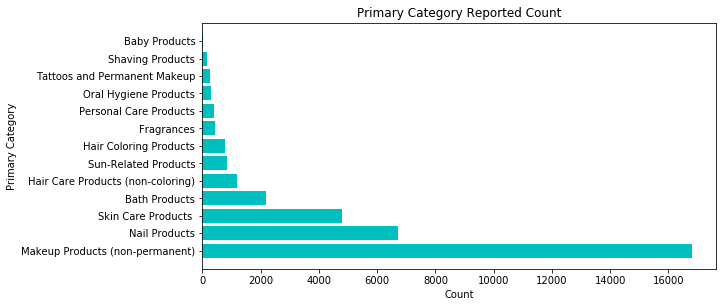

In [36]:
fig, ax= plt.subplots(figsize= (10,4))
plt.barh(cc['index'], cc['Percent'], color='c')
plt.tight_layout()
plt.ylabel('Primary Category')
plt.xlabel('Count')
plt.title('Primary Category Reported Count')

# fig, ax = plt.subplots(figsize = (10,5))
# cgroup['PrimaryCategory'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Category Count')
# ax.set_xlabel('Count')
# ax.set_ylabel('Primary Category')

In [37]:
cat_percent = cgroup.PrimaryCategory.value_counts()*100/34908
cat_percent 

Makeup Products (non-permanent)      48.115045
Nail Products                        19.199037
Skin Care Products                   13.687407
Bath Products                         6.259310
Hair Care Products (non-coloring)     3.440472
Sun-Related Products                  2.394867
Hair Coloring Products                2.274550
Fragrances                            1.223215
Personal Care Products                1.151598
Oral Hygiene Products                 0.888049
Tattoos and Permanent Makeup          0.753409
Shaving Products                      0.501318
Baby Products                         0.111722
Name: PrimaryCategory, dtype: float64

In [38]:
cp = cat_percent.to_frame().reset_index()
cp = cp.rename(columns = {'PrimaryCategory':'Percent'})
##IMPORTANT INFO

Text(0.5, 1.0, 'Primary Category Reported Percentage')

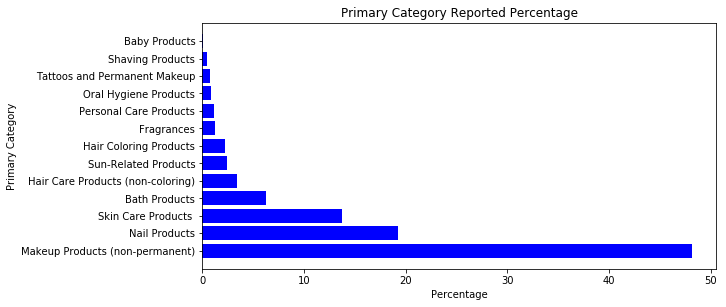

In [39]:
fig, ax= plt.subplots(figsize= (10,4))
plt.barh(cp['index'], cp['Percent'], color='b')
plt.tight_layout()
plt.ylabel('Primary Category')
plt.xlabel('Percentage')
plt.title('Primary Category Reported Percentage')


# Makeup Products (non-permanent)	48.115045
# Nail Products	19.199037
# Skin Care Products	13.687407

**Chemical Counts**

Text(0, 0.5, 'Frequency')

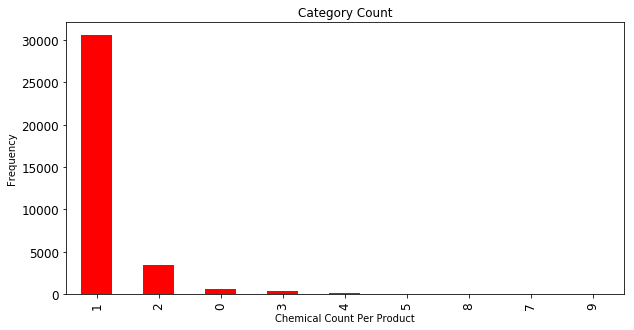

In [40]:
fig, ax = plt.subplots(figsize = (10,5))
cgroup['ChemicalCount'].value_counts().plot(kind='bar', color='r', fontsize =12, title = 'Category Count')
ax.set_xlabel('Chemical Count Per Product')
ax.set_ylabel('Frequency')

In [41]:
#find company with more than 1 chemical count

**Chemical Name**

In [42]:
cdata[cdata['PrimaryCategoryId']=='44'].groupby(['ChemicalName']).count().sort_values(['CDPHId'], ascending=False)

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
ChemicalName,,,,,,,,,,,,,,,
Titanium dioxide,55617,55617,45450,55617,55510,55617,55617,55617,55617,55617,55617,6691,55617,55617,1152
Mica,1529,1529,1129,1529,1528,1529,1529,1529,1529,1529,1529,331,1529,1529,19
"Silica, crystalline (airborne particles of respirable size)",1297,1297,1108,1297,1297,1297,1297,1297,1297,1297,1297,30,1297,1297,107
Talc,1288,1288,1194,1288,1287,1288,1288,1288,1288,1288,1288,7,1288,1288,17
Butylated hydroxyanisole,949,949,861,949,949,949,949,949,949,949,949,70,949,949,4
"Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",834,834,757,834,834,834,834,834,834,834,834,213,834,834,56
Retinyl palmitate,673,673,513,673,673,673,673,673,673,673,673,13,673,673,19
Carbon black,545,545,448,545,545,545,545,545,545,545,545,26,545,545,3
"Mineral oils, untreated and mildly treated",332,332,154,332,332,332,332,332,332,332,332,144,332,332,0


In [43]:
c = cdata[cdata['PrimaryCategoryId']=='44']['ChemicalName'].value_counts()*100/100633
c = c.to_frame().reset_index()
c = c.rename(columns={'ChemicalName':'Percentage'})
#chemical percentage in MAKE UP NONPERMANENT category

In [44]:
cdata['ChemicalName'].value_counts()*100/107512
#chemical used overall

Titanium dioxide                                                                                       76.429608
Silica, crystalline (airborne particles of respirable size)                                             2.123484
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     1.882581
Mica                                                                                                    1.561686
Carbon black                                                                                            1.505878
                                                                                                         ...    
Spironolactone                                                                                          0.000930
Acetylsalicylic acid                                                                                    0.000930
Retinol palmitate                                                                               

**Chemical Name = Trade Secret**

In [45]:
cdata[cdata['ChemicalName'] == 'Trade Secret']

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
6604,2015,bubblegum bubbles no tears shampoo,NaN,farouksystemsinc,BioSilk,1,Baby Products,Baby Shampoos,Trade Secret,0,2009-09-30,2009-09-30,NaT,2009-09-30,2009-10-13,2009-10-13
12038,2902,fds feminine deodorant spray white blossom,NaN,albertoculverusainc,FDS,74,Personal Care Products,Feminine Deodorants,Trade Secret,0,2009-10-08,2009-12-15,NaT,2009-10-08,2010-01-07,2010-01-07
12149,2930,lash primer - confidential,NaN,melaleucainc,Sei Bella - Confidential,44,Makeup Products (non-permanent),Mascara/Eyelash Products,Trade Secret,1,2009-10-08,2014-06-25,NaT,2009-10-08,2009-10-12,2009-10-08
12150,2930,lash primer - confidential,NaN,melaleucainc,Sei Bella - Confidential,44,Makeup Products (non-permanent),Mascara/Eyelash Products,Trade Secret,1,2009-10-08,2014-06-25,NaT,2009-10-08,2009-10-13,2009-10-13
12184,2933,fds feminine deodorant spray ocean breeze,NaN,albertoculverusainc,FDS,74,Personal Care Products,Feminine Deodorants,Trade Secret,0,2009-10-08,2009-10-08,NaT,2009-10-08,2010-01-07,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82986,31727,lipstick,NaN,fmklabs,YL,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Trade Secret,1,2017-09-01,2017-09-01,NaT,2017-09-01,2017-09-01,NaT
82988,31729,matte lipstick,NaN,fmklabs,YB,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Trade Secret,1,2017-09-01,2017-09-01,NaT,2017-09-01,2017-09-01,NaT
85755,32790,som�rfield hair mask cap,Perfume,plcosmetic,SOM�RFIELD,18,Hair Care Products (non-coloring),Other Hair Care Product,Trade Secret,1,2018-03-21,2018-05-07,NaT,2018-05-04,2018-05-04,NaT
89391,33678,professional system heat protect & shine spray,Titanium Dioxide,levladllc,Nature's Gate,18,Hair Care Products (non-coloring),Hair Styling Products,Trade Secret,1,2018-08-01,2019-06-14,2019-04-30,2018-08-01,2018-08-06,2018-08-02


In [46]:
tradesecret = cdata[cdata['ChemicalName'] == 'Trade Secret']
tradesecret
#tradesecret.drop_duplicates() - same as not drop

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
6604,2015,bubblegum bubbles no tears shampoo,NaN,farouksystemsinc,BioSilk,1,Baby Products,Baby Shampoos,Trade Secret,0,2009-09-30,2009-09-30,NaT,2009-09-30,2009-10-13,2009-10-13
12038,2902,fds feminine deodorant spray white blossom,NaN,albertoculverusainc,FDS,74,Personal Care Products,Feminine Deodorants,Trade Secret,0,2009-10-08,2009-12-15,NaT,2009-10-08,2010-01-07,2010-01-07
12149,2930,lash primer - confidential,NaN,melaleucainc,Sei Bella - Confidential,44,Makeup Products (non-permanent),Mascara/Eyelash Products,Trade Secret,1,2009-10-08,2014-06-25,NaT,2009-10-08,2009-10-12,2009-10-08
12150,2930,lash primer - confidential,NaN,melaleucainc,Sei Bella - Confidential,44,Makeup Products (non-permanent),Mascara/Eyelash Products,Trade Secret,1,2009-10-08,2014-06-25,NaT,2009-10-08,2009-10-13,2009-10-13
12184,2933,fds feminine deodorant spray ocean breeze,NaN,albertoculverusainc,FDS,74,Personal Care Products,Feminine Deodorants,Trade Secret,0,2009-10-08,2009-10-08,NaT,2009-10-08,2010-01-07,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82986,31727,lipstick,NaN,fmklabs,YL,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Trade Secret,1,2017-09-01,2017-09-01,NaT,2017-09-01,2017-09-01,NaT
82988,31729,matte lipstick,NaN,fmklabs,YB,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Trade Secret,1,2017-09-01,2017-09-01,NaT,2017-09-01,2017-09-01,NaT
85755,32790,som�rfield hair mask cap,Perfume,plcosmetic,SOM�RFIELD,18,Hair Care Products (non-coloring),Other Hair Care Product,Trade Secret,1,2018-03-21,2018-05-07,NaT,2018-05-04,2018-05-04,NaT
89391,33678,professional system heat protect & shine spray,Titanium Dioxide,levladllc,Nature's Gate,18,Hair Care Products (non-coloring),Hair Styling Products,Trade Secret,1,2018-08-01,2019-06-14,2019-04-30,2018-08-01,2018-08-06,2018-08-02


In [47]:
tradesecret.CompanyName.value_counts()
#SHADY

farouksystemsinc              263
lumeneoy                       74
rollandsrl                     21
albertoculverusainc            12
demeterfragrancelibraryinc     10
greatclipsinc                   9
fmklabs                         8
albertoculver                   5
regiscorporation                3
janmariniskinresearchinc        3
melaleucainc                    2
vi-joninc                       1
levladllc                       1
ca-botanainternational          1
plcosmetic                      1
henkelcorporation               1
Name: CompanyName, dtype: int64

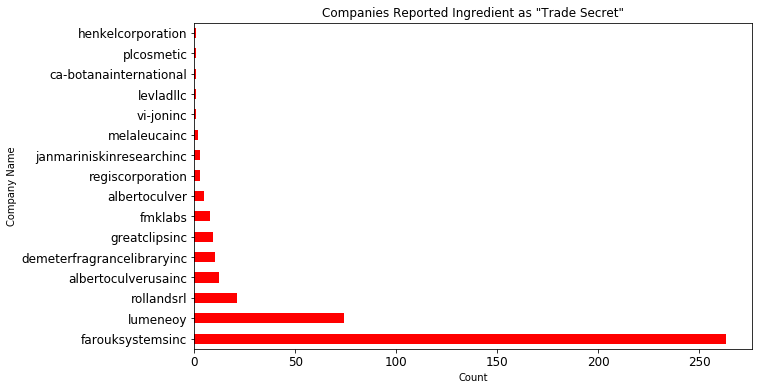

In [48]:
fig, ax= plt.subplots(figsize = (10,6))
tradesecret.CompanyName.value_counts().plot(kind='barh', color = 'r', fontsize=12, title = 'Companies Reported Ingredient as "Trade Secret"')
plt.xlabel('Count')
plt.ylabel('Company Name')
plt.show()

**Some ingredients have been reported to the CSCP as “trade secret.” If "trade secret" is listed as an ingredient for a product on this website, it means that one or more ingredients are known or suspected to cause cancer, birth defects, or other developmental or reproductive harm, but that the reporting company has elected to designate the information as "trade secret."
The term "trade secret" refers to information not generally known to the public, which gives the holder of the information some sort of economic benefit. This may include formulas, patterns, or devices. Trade secret information, including ingredients exempt from disclosure on cosmetics labels, is not exempt from CSCP reporting requirements. However, the California Department of Public Health (CDPH) cannot make any confidential and/or trade secret information available to the public unless the outcome of a CDPH investigation deems the information is not confidential and/or a trade secret.**

**Let's dive deeper to Farouk Systems Inc**

Farouk Systems is a company of hairdressers for hairdressers. Based in Houston, Texas, USA, Farouk Systems manufactures products and tools under the brands CHI, BioSilk, CHI Man, CHI Pet and Sunglitz, for shipment to over 100 countries worldwide. Through Advanced American Technology, professionals and consumers are provided with the most sought after hair tools and products in the industry.
 
    -its main categories
    -any other chems?
    -its brands

In [49]:
farouk = cdata[cdata['CompanyName'] == 'farouksystemsinc']
farouk

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
6604,2015,bubblegum bubbles no tears shampoo,NaN,farouksystemsinc,BioSilk,1,Baby Products,Baby Shampoos,Trade Secret,0,2009-09-30,2009-09-30,NaT,2009-09-30,2009-10-13,2009-10-13
14692,3368,bubblegum bubbles fun body foam (blue),NaN,farouksystemsinc,BioSilk,6,Bath Products,Bubble and Foam Bath Products,Trade Secret,1,2009-10-12,2009-10-12,NaT,2009-10-12,2009-10-12,NaT
15010,3463,bubblegum bubbles fun body foam grape-tacular ...,NaN,farouksystemsinc,BioSilk,6,Bath Products,Bubble and Foam Bath Products,Trade Secret,1,2009-10-12,2009-10-12,NaT,2009-10-12,2009-10-12,NaT
15025,3466,bubblegum bubbles fun body foam bubblegum pink,NaN,farouksystemsinc,BioSilk,6,Bath Products,Bubble and Foam Bath Products,Trade Secret,1,2009-10-12,2009-10-12,NaT,2009-10-12,2009-10-12,NaT
15066,3480,biosilk smoothing balm,NaN,farouksystemsinc,BioSilk,18,Hair Care Products (non-coloring),Hair Styling Products,Titanium dioxide,1,2009-10-12,2018-01-18,NaT,2009-10-12,2018-01-18,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,4656,color vision white brightner,NaN,farouksystemsinc,Sunglitz,18,Hair Care Products (non-coloring),Hair Styling Products,Trade Secret,1,2009-10-14,2009-10-14,NaT,2009-10-14,2009-10-14,NaT
19101,4657,white lightener,NaN,farouksystemsinc,Sunglitz,18,Hair Care Products (non-coloring),Hair Styling Products,Titanium dioxide,1,2009-10-14,2018-01-18,NaT,2009-10-14,2018-01-18,NaT
19107,4662,chromatic color white virtual reality,NaN,farouksystemsinc,Chromatic,32,Hair Coloring Products,Hair Lighteners with Color,Trade Secret,1,2009-10-14,2009-10-14,NaT,2009-10-14,2009-10-14,NaT
19108,4663,bad azz,NaN,farouksystemsinc,BioSilk,18,Hair Care Products (non-coloring),Hair Styling Products,Trade Secret,1,2009-10-14,2009-10-14,NaT,2009-10-14,2009-10-14,NaT


In [50]:
farouk.nunique()

CDPHId                    266
ProductName               262
CSF                         0
CompanyName                 1
BrandName                   8
PrimaryCategoryId           5
PrimaryCategory             5
SubCategory                13
ChemicalName                2
ChemicalCount               3
InitialDateReported         5
MostRecentDateReported     10
DiscontinuedDate            0
ChemicalCreatedAt           5
ChemicalUpdatedAt           7
ChemicalDateRemoved         2
dtype: int64

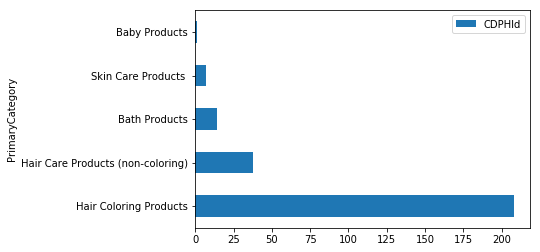

In [51]:
farouk_cat = farouk.groupby(['PrimaryCategory'])
farouk_cat.count().sort_values(by=['CDPHId'], ascending=False)[['CDPHId']].plot(kind='barh')

In [52]:
farouk[farouk['ChemicalName']=='Trade Secret'].count()

CDPHId                    263
ProductName               263
CSF                         0
CompanyName               263
BrandName                 263
PrimaryCategoryId         263
PrimaryCategory           263
SubCategory               263
ChemicalName              263
ChemicalCount             263
InitialDateReported       263
MostRecentDateReported    263
DiscontinuedDate            0
ChemicalCreatedAt         263
ChemicalUpdatedAt         263
ChemicalDateRemoved         2
dtype: int64

//findings// 
- farouk reported total of 266 products, only have 2 ingredients Trade Secret and Titanium Diox
- ***263 products out of 266 reported include 'Trade Secret'***

In [53]:
farouksecret = tradesecret[tradesecret['CompanyName']=='farouksystemsinc']
farouksecret

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
6604,2015,bubblegum bubbles no tears shampoo,NaN,farouksystemsinc,BioSilk,1,Baby Products,Baby Shampoos,Trade Secret,0,2009-09-30,2009-09-30,NaT,2009-09-30,2009-10-13,2009-10-13
14692,3368,bubblegum bubbles fun body foam (blue),NaN,farouksystemsinc,BioSilk,6,Bath Products,Bubble and Foam Bath Products,Trade Secret,1,2009-10-12,2009-10-12,NaT,2009-10-12,2009-10-12,NaT
15010,3463,bubblegum bubbles fun body foam grape-tacular ...,NaN,farouksystemsinc,BioSilk,6,Bath Products,Bubble and Foam Bath Products,Trade Secret,1,2009-10-12,2009-10-12,NaT,2009-10-12,2009-10-12,NaT
15025,3466,bubblegum bubbles fun body foam bubblegum pink,NaN,farouksystemsinc,BioSilk,6,Bath Products,Bubble and Foam Bath Products,Trade Secret,1,2009-10-12,2009-10-12,NaT,2009-10-12,2009-10-12,NaT
15073,3488,chi scentuals mango melon hand and body wash,NaN,farouksystemsinc,CHI,6,Bath Products,Body Washes and Soaps,Trade Secret,1,2009-10-12,2009-10-12,NaT,2009-10-12,2009-10-12,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19093,4653,zero gravity promade,NaN,farouksystemsinc,BioSilk,18,Hair Care Products (non-coloring),Hair Styling Products,Trade Secret,1,2009-10-14,2009-10-14,NaT,2009-10-14,2009-10-14,NaT
19100,4656,color vision white brightner,NaN,farouksystemsinc,Sunglitz,18,Hair Care Products (non-coloring),Hair Styling Products,Trade Secret,1,2009-10-14,2009-10-14,NaT,2009-10-14,2009-10-14,NaT
19107,4662,chromatic color white virtual reality,NaN,farouksystemsinc,Chromatic,32,Hair Coloring Products,Hair Lighteners with Color,Trade Secret,1,2009-10-14,2009-10-14,NaT,2009-10-14,2009-10-14,NaT
19108,4663,bad azz,NaN,farouksystemsinc,BioSilk,18,Hair Care Products (non-coloring),Hair Styling Products,Trade Secret,1,2009-10-14,2009-10-14,NaT,2009-10-14,2009-10-14,NaT


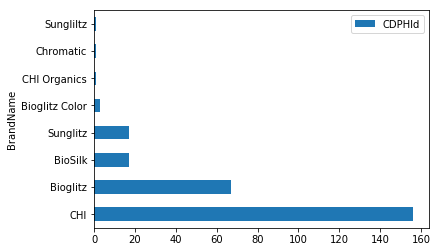

In [54]:
fbrand = farouksecret.groupby(['BrandName']).count().sort_values(by=['CDPHId'], ascending=False)[['CDPHId']]
fbrand.plot(kind='barh')

**Chemical Name Cont.**

Text(0, 0.5, 'Frequency')

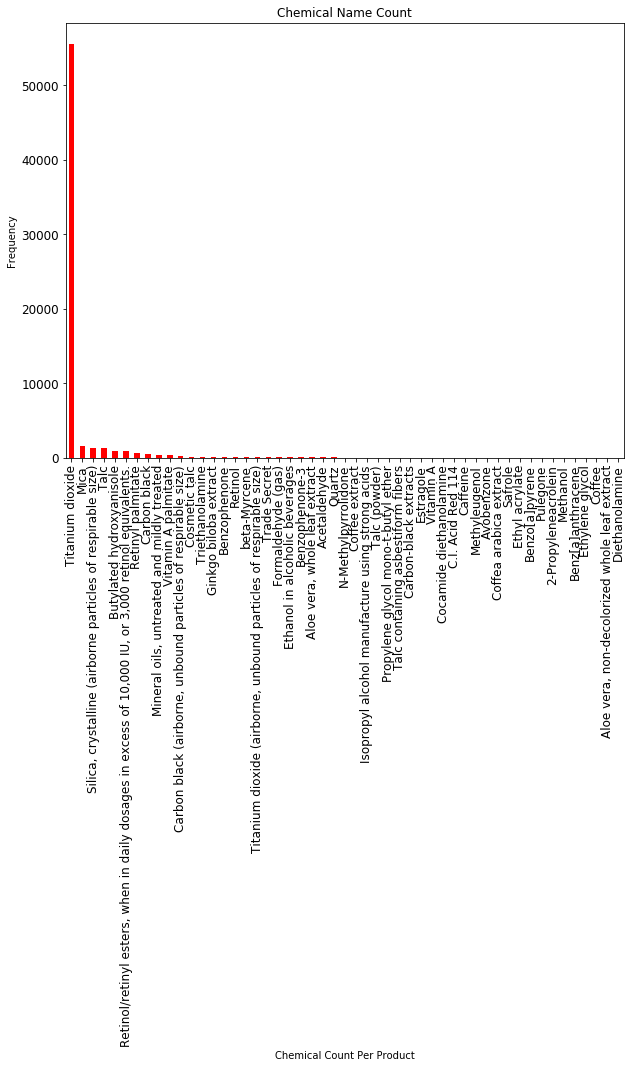

In [55]:
fig, ax = plt.subplots(figsize = (10,8))
cdata[cdata['PrimaryCategoryId']=='44']['ChemicalName'].value_counts().plot(kind='bar', color='r', fontsize =12, title = 'Chemical Name Count')
ax.set_xlabel('Chemical Count Per Product')
ax.set_ylabel('Frequency')

**plot bar graph of each category and stack the chemicals used in each bar**

In [56]:
pivot_df = cdata.pivot_table(index='PrimaryCategory', columns='ChemicalName', values='CDPHId', aggfunc='count')
#pivot_df

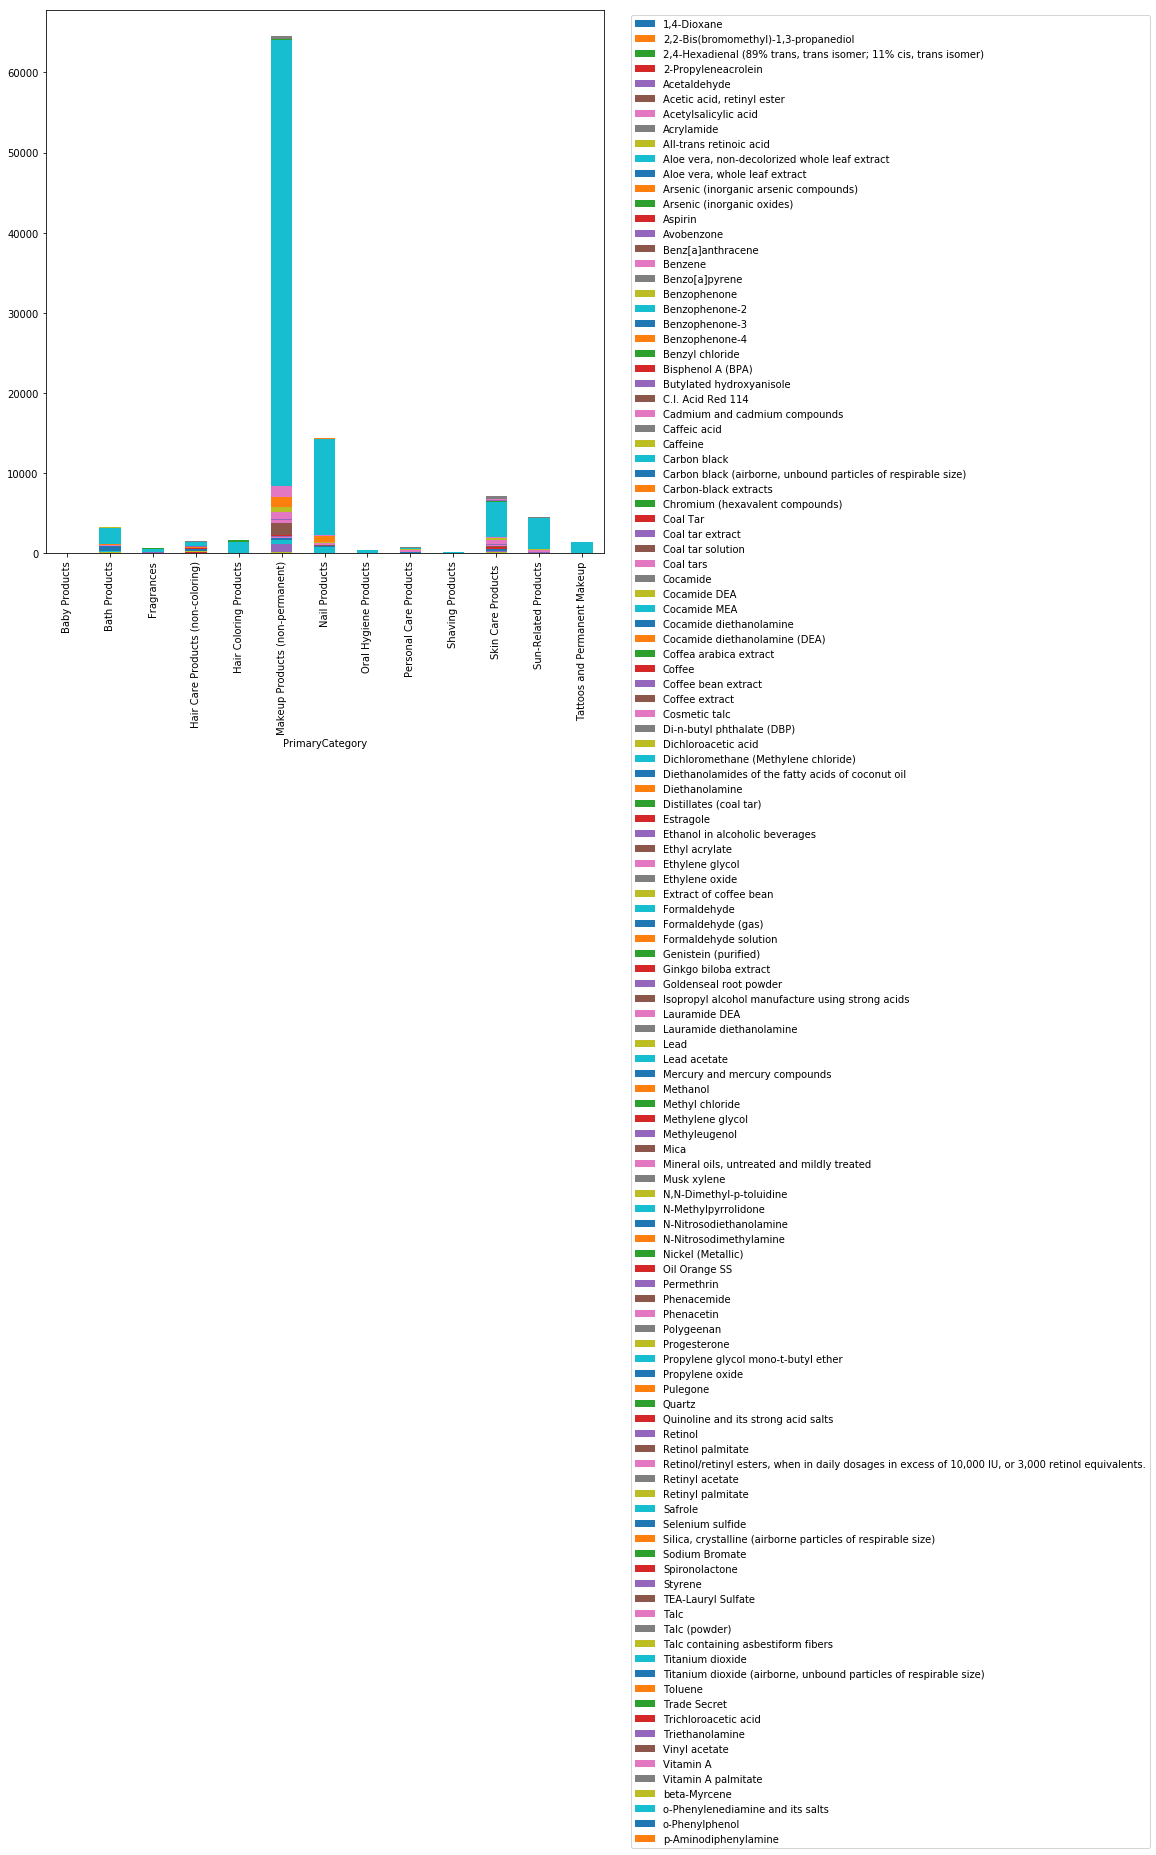

In [57]:
pivot_df.loc[:,:].plot.bar(stacked=True, figsize=(10,10))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

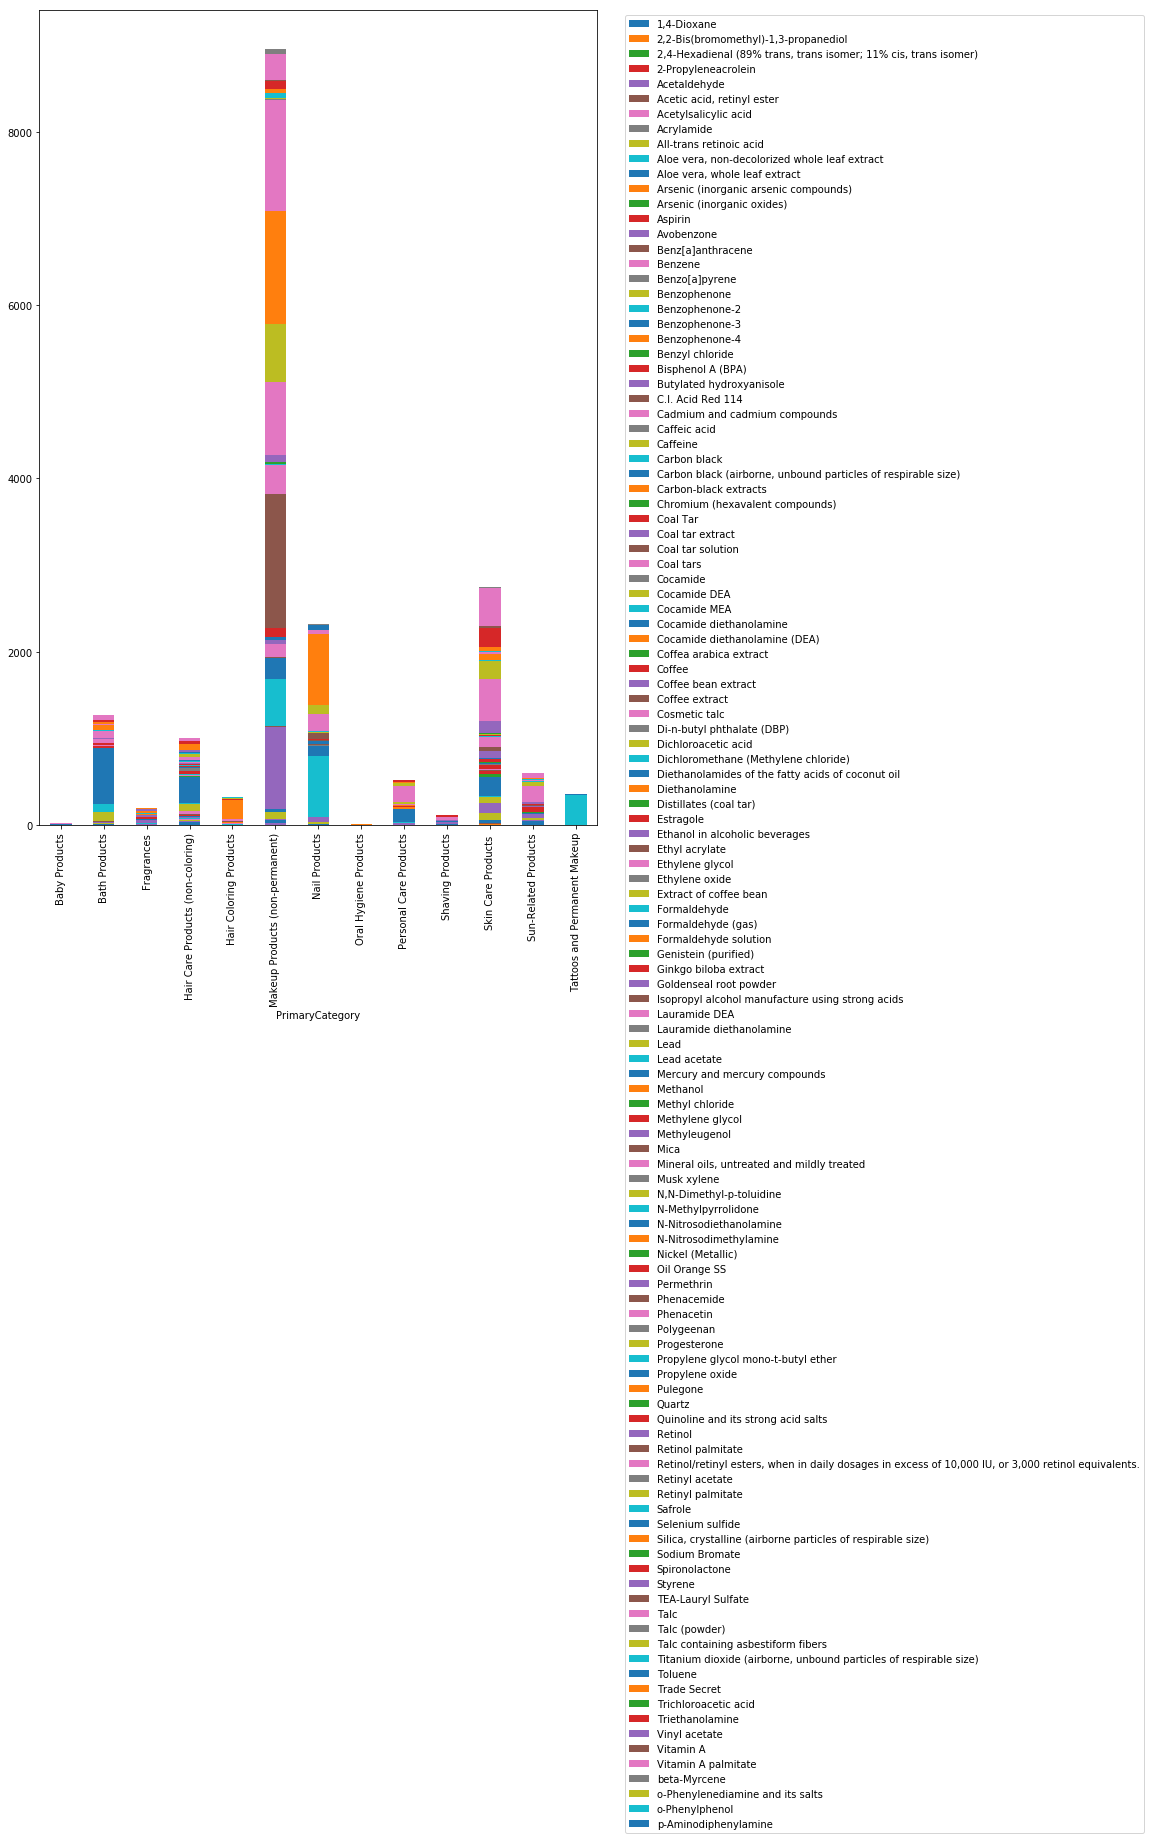

In [58]:
#plot w/o titanium
pivot_df.loc[:,pivot_df.columns !='Titanium dioxide'].plot.bar(stacked=True, figsize=(10,15))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [59]:
#Try splitting into chems above mean and other chems
#do i need to creat ChemType column?
#below 7 chems and others, so 8 types total

In [60]:
chem = cdata.ChemicalName.value_counts()*100/107512
chem = chem.to_frame().reset_index()
chem = chem.rename(columns = {'ChemicalName':'Percentage'})
chem = chem[chem.Percentage >= chem.Percentage.mean()]
chem

,index,Percentage
0,Titanium dioxide,76.429608
1,"Silica, crystalline (airborne particles of res...",2.123484
2,"Retinol/retinyl esters, when in daily dosages ...",1.882581
3,Mica,1.561686
4,Carbon black,1.505878
5,Talc,1.271486
6,Cocamide diethanolamine,1.257534
7,Butylated hydroxyanisole,1.176613
8,Retinyl palmitate,1.040814
9,Vitamin A palmitate,0.834325


In [61]:
100-chem['Percentage'].sum()

10.915990773123013

In [62]:
chem =chem.append({'index':'Other Chemicals', 'Percentage':100-chem['Percentage'].sum()}, ignore_index=True)


In [63]:
chem

,index,Percentage
0,Titanium dioxide,76.429608
1,"Silica, crystalline (airborne particles of res...",2.123484
2,"Retinol/retinyl esters, when in daily dosages ...",1.882581
3,Mica,1.561686
4,Carbon black,1.505878
5,Talc,1.271486
6,Cocamide diethanolamine,1.257534
7,Butylated hydroxyanisole,1.176613
8,Retinyl palmitate,1.040814
9,Vitamin A palmitate,0.834325


In [64]:
chemlist = [c for c in chem['index']]
chemlist

['Titanium dioxide',
 'Silica, crystalline (airborne particles of respirable size)',
 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
 'Mica',
 'Carbon black',
 'Talc',
 'Cocamide diethanolamine',
 'Butylated hydroxyanisole',
 'Retinyl palmitate',
 'Vitamin A palmitate',
 'Other Chemicals']

In [65]:
chemdict = {}
for c in chem['index']:
    if c not in chemdict:
        chemdict[c] =1

/Users/suchaya/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


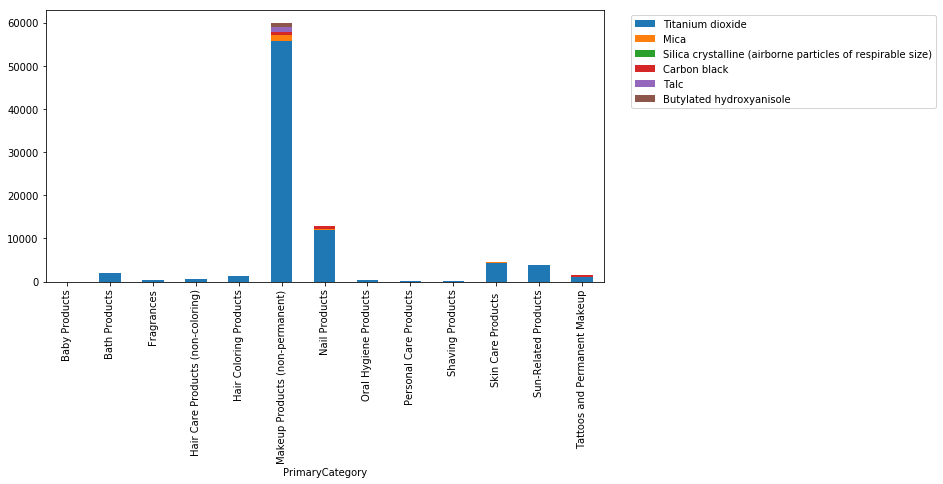

In [66]:
#high chems and other chems
pivot_df.loc[:,['Titanium dioxide', 'Mica','Silica crystalline (airborne particles of respirable size)','Carbon black','Talc','Butylated hydroxyanisole']].plot.bar(stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

**from above graph, make up products made up most of the data set. Let's take a deeper look at it**
- make up subcategory
- Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils, Face Powders, Foundations and Bases, Lip Balm (making a cosmetic claim), Lip Color - Lipsticks, Liners, and Pencils, Lip Gloss/Shine, Makup Fixatives, Makeup Preparations, Mascara/Eyelash Products, Paints (e.g. facial, body), Rouges, Other Makeup Productexamine MAKE UP PRODUCT (non-permanent) category**
- chemical most used

In [67]:
makeup_sub = ['Blushes', 'Eye Shadow', 'Eyeliner/Eyebrow Pencils', 'Face Powders', 'Foundations and Bases', 'Lip Balm (making a cosmetic claim)', 'Lip Color - Lipsticks, Liners, and Pencils', 'Lip Gloss/Shine', 'Makup Fixatives', 'Makeup Preparations', 'Mascara/Eyelash Products', 'Paints (e.g. facial, body)', 'Rouges', 'Other Makeup Product']

In [68]:
len(makeup_sub) #14 sub categories in make up

14

In [69]:
makeupsub = cgroup[cgroup.PrimaryCategory == 'Makeup Products (non-permanent)']

Text(0, 0.5, 'SubCategory')

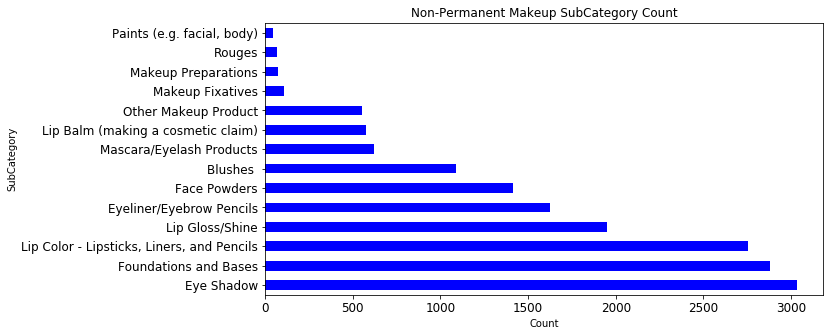

In [70]:
fig, ax = plt.subplots(figsize = (10,5))
makeupsub['SubCategory'].value_counts().plot(kind='barh', color='b', fontsize =12, title = 'Non-Permanent Makeup SubCategory Count')
ax.set_xlabel('Count')
ax.set_ylabel('SubCategory')

Text(0, 0.5, 'SubCategory')

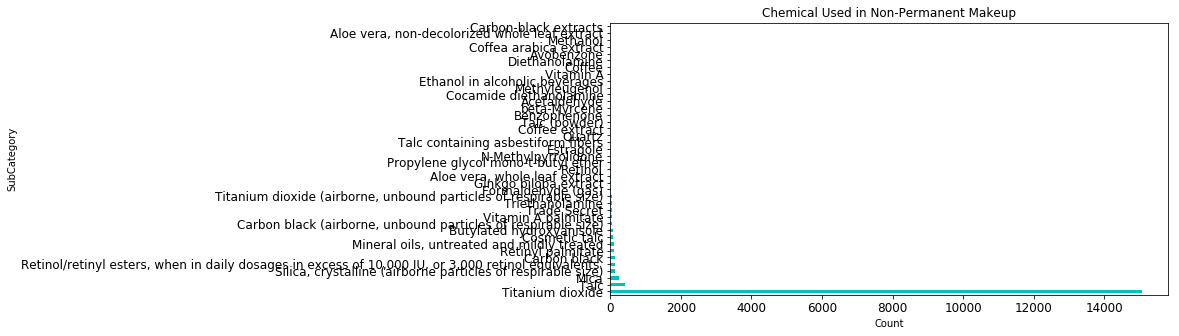

In [71]:
#most used chemical in non-permanent make up
fig, ax = plt.subplots(figsize = (10,5))
makeupsub['ChemicalName'].value_counts().plot(kind='barh', color='c', fontsize =12, title = 'Chemical Used in Non-Permanent Makeup')
ax.set_xlabel('Count')
ax.set_ylabel('SubCategory')

In [72]:
#plot chem used in make up category

**CompanyName**

In [73]:
#total of 584 companies reported
#total of 34908 reported products
comp = cgroup.CompanyName.value_counts()*100/34908
comp = comp.to_frame().reset_index()
comp = comp.rename(columns = {'CompanyName':'Percentage'})
comp

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailalliance-entity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
...,...,...
579,smith&vandivercorporation,0.002865
580,luxurybrandpartners,0.002865
581,thetendskincompany,0.002865
582,thebrowgal,0.002865


Text(0, 0.5, 'Count')

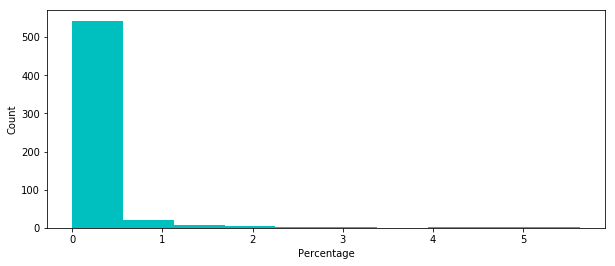

In [74]:
plt.subplots(figsize=(10,4))
plt.hist(comp.Percentage, color='c')
plt.xlabel('Percentage')
plt.ylabel('Count')

In [75]:
#NEED CRITERIA to determine interesting/meaningful company data to look further into
comp[comp.Percentage >= 1]

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailalliance-entity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
5,buth-na-bodhaigeinc,2.962072
6,theprocter&gamblecompany,2.394867
7,anastasiabeverlyhillsllc,2.360490
8,hand&nailharmonyinc,2.165693
9,victoria'ssecretbeauty,2.128452


In [76]:
comp[comp.Percentage > comp.Percentage.mean()]

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailalliance-entity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
...,...,...
101,sunpharmaceuticalsllc,0.180474
102,olympicmountainproducts,0.177610
103,thehaincelestialgroupinc,0.174745
104,beautysolutionsltd,0.174745


In [77]:
#comp[comp.Percentage > comp.Percentage.median()]

In [78]:
comp[comp.Percentage > comp.Percentage.quantile(0.90)].count()

index         59
Percentage    59
dtype: int64

In [79]:
#observing the company with highest percentage reported product 
brand_a = cgroup[cgroup['CompanyName'] == 'americaninternationalindustries']
brand_a.groupby(['BrandName']).count().sort_values(by=['ProductName'], ascending=False)

,CDPHId,ProductName,CSF,CompanyName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved
BrandName,,,,,,,,,,,,,,,
China Glaze,441,441,0,441,441,441,441,441,441,441,441,0,441,441,2
IBD,406,406,0,406,406,406,406,406,406,406,406,0,406,406,1
EzFlow,253,253,0,253,253,253,253,253,253,253,253,0,253,253,0
Salon Perfect,98,98,0,98,98,98,98,98,98,98,98,0,98,98,0
Seche,88,88,0,88,88,88,88,88,88,88,88,0,88,88,0
SuperNail,79,79,0,79,79,79,79,79,79,79,79,0,79,79,0
Super Nail,42,42,0,42,42,42,42,42,42,42,42,0,42,42,0
Body Drench,41,41,0,41,41,41,41,41,41,41,41,0,41,41,0
Gelaze,40,40,0,40,40,40,40,40,40,40,40,0,40,40,0


**DATE COLUMNS**

In [80]:
cdata['MostRecentDateReported'].sort_values()

1        2009-07-01
2        2009-07-01
36       2009-08-11
37       2009-08-11
46       2009-08-18
            ...    
107480   2019-12-16
107481   2019-12-16
107482   2019-12-16
107471   2019-12-16
107511   2019-12-16
Name: MostRecentDateReported, Length: 100633, dtype: datetime64[ns]

In [81]:
cdata['InitialDateReported'].sort_values()

0        2009-06-17
1        2009-07-01
2        2009-07-01
3        2009-07-09
4        2009-07-09
            ...    
107481   2019-12-16
107482   2019-12-16
107483   2019-12-16
107472   2019-12-16
107511   2019-12-16
Name: InitialDateReported, Length: 100633, dtype: datetime64[ns]

//findings//
- earliest initialdatereported is 2009-06-17, latest is  2019-12-16
- earliest mostrecentdatereported is 2009-07-01, latest is 2019-12-16

In [82]:
cdata['InitialDateReported'].value_counts()

2009-10-13    2269
2009-10-08    1781
2009-10-15    1533
2009-10-12    1510
2009-10-07    1507
              ... 
2011-04-20       1
2012-11-01       1
2011-01-06       1
2018-05-19       1
2012-03-04       1
Name: InitialDateReported, Length: 2120, dtype: int64

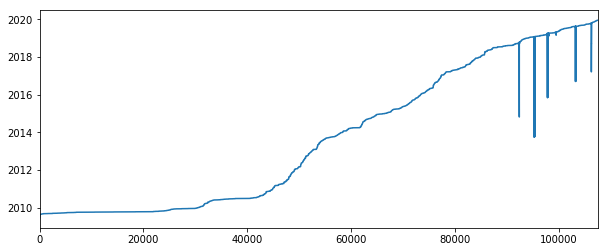

In [83]:
fig,ax= plt.subplots(figsize=(10,4))
cdata['InitialDateReported'].plot()
#this plot does not give meaningful meaning

Text(0, 0.5, 'Year')

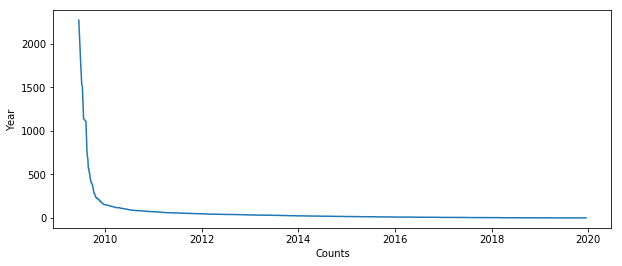

In [84]:
fig,ax= plt.subplots(figsize=(10,4))
ax.plot(cdata['InitialDateReported'].unique(), cdata.InitialDateReported.value_counts())
ax.set_xlabel('Counts')
ax.set_ylabel('Year')

//Findings//
-company tends to report less over the years, could be because they already report as of 2009 when they were required to do so

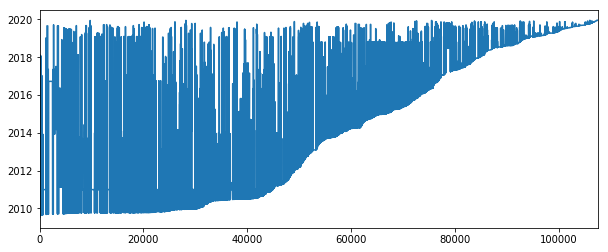

In [85]:
fig,ax= plt.subplots(figsize=(10,4))
cdata['MostRecentDateReported'].plot()

(1, 1750)

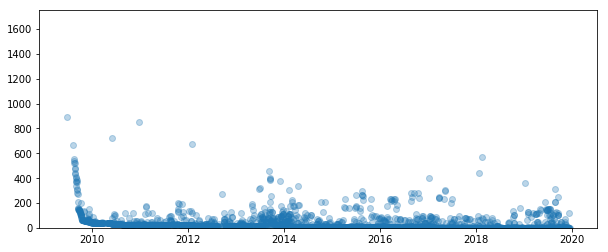

In [86]:
fig,ax= plt.subplots(figsize=(10,4))
ax.scatter(cdata['MostRecentDateReported'].unique(), cdata.MostRecentDateReported.value_counts(), alpha=0.3)
ax.set_ylim(1,1750)


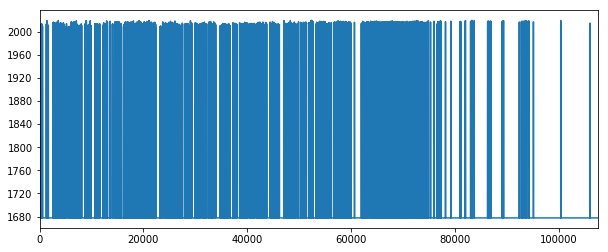

In [87]:
fig,ax= plt.subplots(figsize=(10,4))
cdata['DiscontinuedDate'].plot()

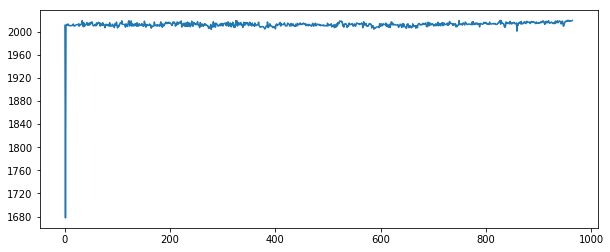

In [88]:
fig,ax= plt.subplots(figsize=(10,4))
ax.plot(cdata['DiscontinuedDate'].unique())

In [89]:
inidate = cgroup.InitialDateReported.value_counts()
inidate = inidate.to_frame().reset_index()
inidate = inidate.rename(columns = {'InitialDateReported':'Count'})

In [90]:
mrdate = cgroup.MostRecentDateReported.value_counts()
mrdate = mrdate.to_frame().reset_index()
mrdate = mrdate.rename(columns = {'MostRecentDateReported':'Count'})

In [91]:
disdate = cgroup.DiscontinuedDate.value_counts()
disdate = disdate.to_frame().reset_index()
disdate = disdate.rename(columns = {'DiscontinuedDate':'Count'})

In [92]:
rmdate = cgroup.ChemicalDateRemoved.value_counts()
rmdate = rmdate.to_frame().reset_index()
rmdate = rmdate.rename(columns = {'ChemicalDateRemoved':'Count'})

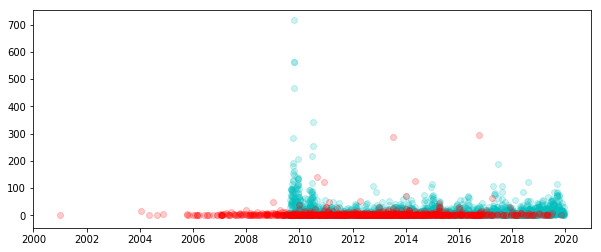

In [93]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(inidate['index'],inidate['Count'], color='c', alpha=0.2)
ax.scatter(disdate['index'],disdate['Count'], color='red', alpha =0.2)
#ax.plot(inidate['index'], inidate['Count'], color='c')
#ax.plot(mrdate['index'], mrdate['Count'], color='blue', alpha=0.2)

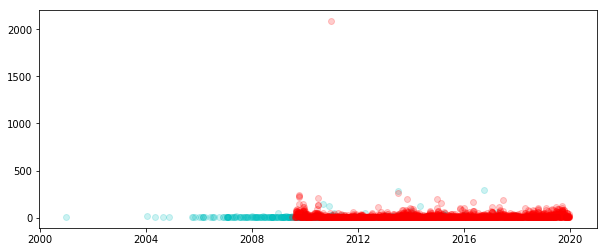

In [94]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(disdate['index'], disdate['Count'], color='c', alpha=0.2)
ax.scatter(mrdate['index'], mrdate['Count'], color='red', alpha=0.2)

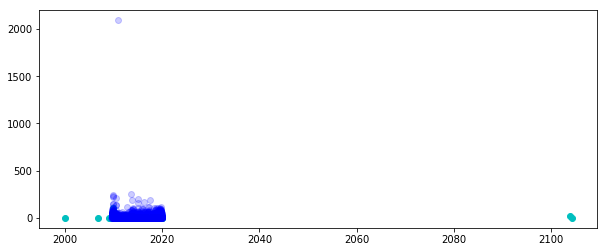

In [95]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(rmdate['index'], rmdate['Count'], color='c')
ax.scatter(mrdate['index'], mrdate['Count'], color='blue', alpha=0.2)

In [96]:
#creating new column Discontinued
cdata['Discontinued'] = np.where(cdata['DiscontinuedDate'].isnull(),False,True)
cdata.head()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued
0,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",Titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,False
2,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),Estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,False
3,4,precision glimmer eye liner-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,Titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,False
4,5,avon brilliant shine lip gloss-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,Titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True


In [97]:
cdata.dtypes

CDPHId                            object
ProductName                       object
CSF                               object
CompanyName                       object
BrandName                         object
PrimaryCategoryId                 object
PrimaryCategory                   object
SubCategory                       object
ChemicalName                      object
ChemicalCount                      int64
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
Discontinued                        bool
dtype: object

Text(0, 0.5, 'Most Recent Report')

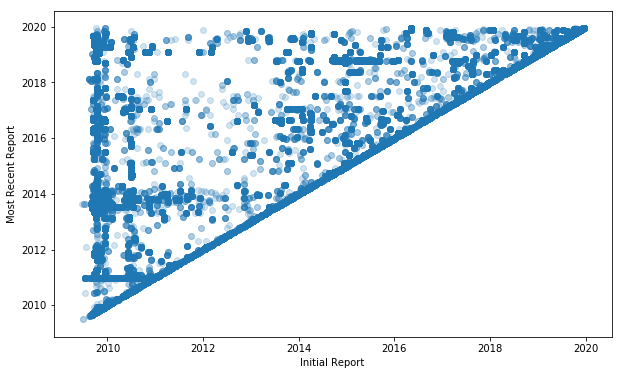

In [98]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cdata['InitialDateReported'], cdata['MostRecentDateReported'], alpha =0.2)
ax.set_xlabel('Initial Report')
ax.set_ylabel('Most Recent Report')

Text(0, 0.5, 'Most Recent Report')

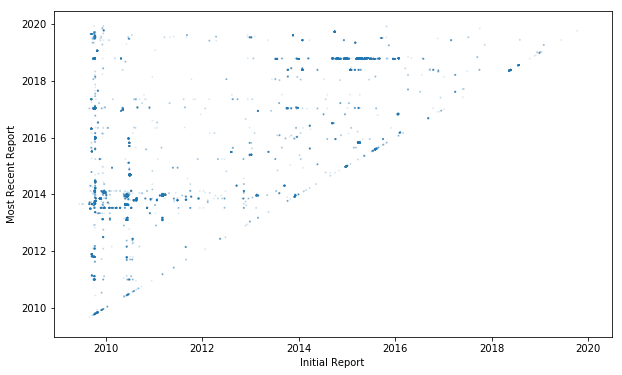

In [99]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(cdata['InitialDateReported'], cdata['MostRecentDateReported'], s = cdata['Discontinued'], alpha=0.1)
ax.set_xlabel('Initial Report')
ax.set_ylabel('Most Recent Report')

In [100]:
cdata['DiscontinuedDate'].min()

Timestamp('2001-01-01 00:00:00')

In [101]:
cdata['DiscontinuedDate'].max()

Timestamp('2019-11-07 00:00:00')

(730486.0, 737370.0)

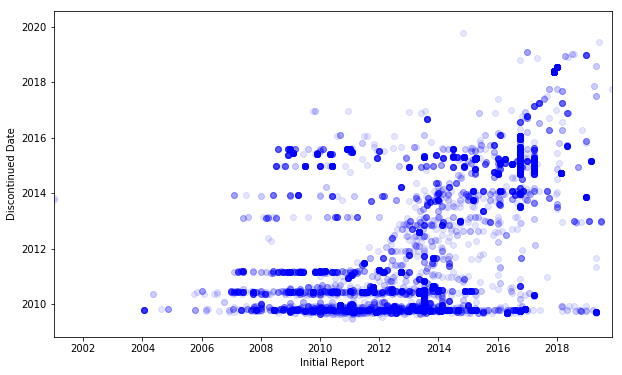

In [102]:
import datetime
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(cdata['DiscontinuedDate'],cdata['InitialDateReported'], color='b',alpha=0.1)
ax.set_xlabel('Initial Report')
ax.set_ylabel('Discontinued Date')

ax.set_xlim(cdata['DiscontinuedDate'].min(),cdata['DiscontinuedDate'].max())
#set ax limit cus of some Null values

Text(0, 0.5, 'Discontinued Date')

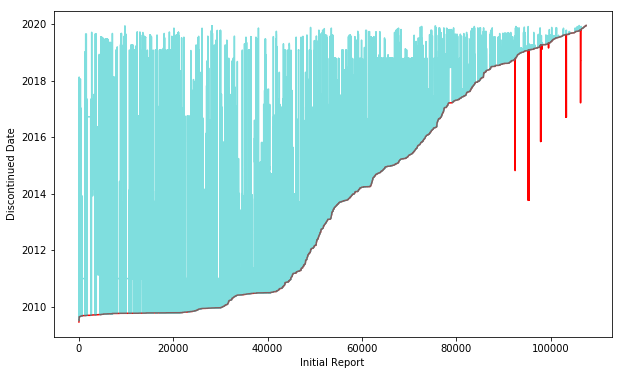

In [103]:
import datetime
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(cdata['InitialDateReported'], color ='r')
ax.plot(cdata['MostRecentDateReported'], color ='c', alpha =0.5)
ax.set_xlabel('Initial Report')
ax.set_ylabel('Discontinued Date')


Text(0, 0.5, 'Most Recent Report')

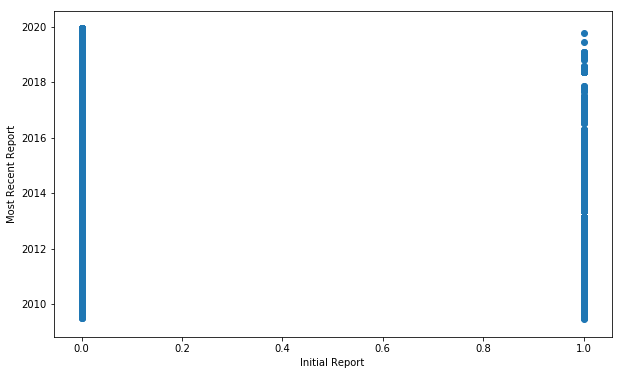

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(cdata['Discontinued'], cdata['InitialDateReported'])
ax.set_xlabel('Initial Report')
ax.set_ylabel('Most Recent Report')

In [105]:
#chemical name & discontinued 

In [106]:
cdata['ChemicalName'].value_counts()

Titanium dioxide                                                                                       82171
Silica, crystalline (airborne particles of respirable size)                                             2283
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2024
Mica                                                                                                    1679
Carbon black                                                                                            1619
                                                                                                       ...  
Spironolactone                                                                                             1
Acetylsalicylic acid                                                                                       1
Retinol palmitate                                                                                          1
Arsenic (inorganic 

In [107]:
chemcount = cdata['ChemicalName'].value_counts()
chemcount

Titanium dioxide                                                                                       82171
Silica, crystalline (airborne particles of respirable size)                                             2283
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2024
Mica                                                                                                    1679
Carbon black                                                                                            1619
                                                                                                       ...  
Spironolactone                                                                                             1
Acetylsalicylic acid                                                                                       1
Retinol palmitate                                                                                          1
Arsenic (inorganic 

In [108]:
#cdata[cdata['Discontinued'] ==True]['ChemicalName'].unique()

In [109]:
chemdiscont = cdata[cdata['Discontinued'] == True]['ChemicalName'].value_counts()
chemdiscont

Titanium dioxide                                                                                       9514
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     633
Mica                                                                                                    364
Cocamide diethanolamine                                                                                 343
Butylated hydroxyanisole                                                                                177
                                                                                                       ... 
Spironolactone                                                                                            1
Acrylamide                                                                                                1
Genistein (purified)                                                                                      1
TEA-Lauryl Sulfate          

In [110]:
type(chemcount)

pandas.core.series.Series

In [111]:
discontdict={}
for cl in chemlist:
    if cl in chemdiscont:
            discontdict[cl] = chemdiscont[cl]
            
chemdict = {}
for cl in chemlist:
        if cl in chemcount:
            chemdict[cl] = chemcount[cl]
            
print(discontdict)
print(chemdict)

{'Titanium dioxide': 9514, 'Silica, crystalline (airborne particles of respirable size)': 94, 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.': 633, 'Mica': 364, 'Carbon black': 82, 'Talc': 7, 'Cocamide diethanolamine': 343, 'Butylated hydroxyanisole': 177, 'Retinyl palmitate': 44, 'Vitamin A palmitate': 33}
{'Titanium dioxide': 82171, 'Silica, crystalline (airborne particles of respirable size)': 2283, 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.': 2024, 'Mica': 1679, 'Carbon black': 1619, 'Talc': 1367, 'Cocamide diethanolamine': 1352, 'Butylated hydroxyanisole': 1265, 'Retinyl palmitate': 1119, 'Vitamin A palmitate': 897}


In [112]:
discontratio={}
for cl in chemlist:
    if cl in chemdiscont:
        if cl in chemcount:
            discontratio[cl] =chemdiscont[cl]/chemcount[cl]
discontratio

{'Titanium dioxide': 0.11578294045344464,
 'Silica, crystalline (airborne particles of respirable size)': 0.04117389399912396,
 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.': 0.31274703557312256,
 'Mica': 0.2167957117331745,
 'Carbon black': 0.0506485484867202,
 'Talc': 0.005120702267739576,
 'Cocamide diethanolamine': 0.253698224852071,
 'Butylated hydroxyanisole': 0.1399209486166008,
 'Retinyl palmitate': 0.03932082216264522,
 'Vitamin A palmitate': 0.03678929765886288}

In [113]:
# for cl in chemlist:
#     if cl in chemcount:
#         print(cl, chemcount[cl])

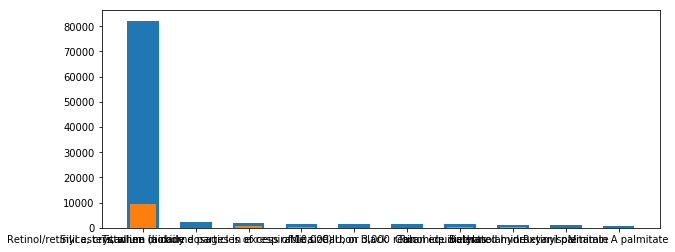

In [114]:
fig,ax = plt.subplots(figsize= (10,4))
ax.bar([k for k,v in chemdict.items()], [v for k,v in chemdict.items()], width=0.6)
ax.bar([k for k,v in discontdict.items()], [v for k,v in discontdict.items()], width=0.5)
plt.show()
#ax.barh([k for k,v in discontratio.items()], [v for k,v in discontratio.items()], color='c')

In [115]:
# r1 = np.arange(len([v for k,v in chemdict.items()]))
# r2 = [x + 0.75 for x in r1]
# fig,ax = plt.subplots(figsize= (10,4))
# ax.bar(r1, [v for k,v in chemdict.items()])
# ax.bar(r2, [v for k,v in discontdict.items()])
# plt.show()

<BarContainer object of 66 artists>

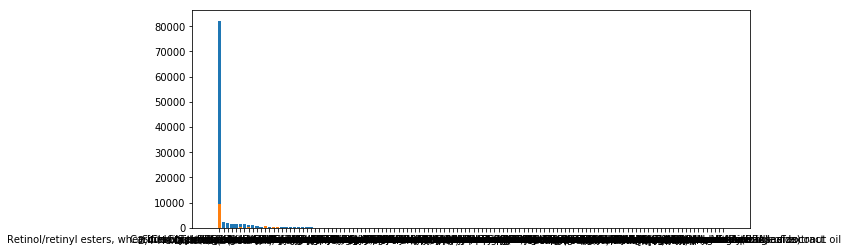

In [116]:
fig, ax = plt.subplots(figsize = (10,4))
ax.bar(cdata['ChemicalName'].unique(), cdata['ChemicalName'].value_counts())
ax.bar(cdata[cdata['Discontinued'] ==True]['ChemicalName'].unique(), cdata[cdata['Discontinued'] == True]['ChemicalName'].value_counts())

In [117]:
#only high reported chem


In [118]:
#something's wrong with discountinued date column

In [119]:
#sorted(cdata['DiscontinuedDate'].unique())

# hypothesis ideas

- given probabilities of finding Titanium Dioxide in the data set, what's the prob of picking an individual product with TD 
- probabilities of getting product with more than 1 reported chem

In [120]:
chem

,index,Percentage
0,Titanium dioxide,76.429608
1,"Silica, crystalline (airborne particles of res...",2.123484
2,"Retinol/retinyl esters, when in daily dosages ...",1.882581
3,Mica,1.561686
4,Carbon black,1.505878
5,Talc,1.271486
6,Cocamide diethanolamine,1.257534
7,Butylated hydroxyanisole,1.176613
8,Retinyl palmitate,1.040814
9,Vitamin A palmitate,0.834325


In [121]:
chemical = cdata.groupby(['ChemicalName'])
chemical.nunique().sort_values(by=['CDPHId'], ascending= False).head(60)

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued
ChemicalName,,,,,,,,,,,,,,,,,
Titanium dioxide,30149,27325,31388,439,2048,13,13,86,1,7,1992,1876,782,2017,2015,245,2
"Silica, crystalline (airborne particles of respirable size)",1281,1225,707,38,100,10,10,45,1,8,206,192,15,213,210,21,2
Cocamide diethanolamine,873,768,352,125,272,11,11,30,1,5,131,194,160,133,173,105,2
"Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",719,687,1024,47,121,10,10,51,1,6,110,151,103,111,128,26,2
Carbon black,685,576,885,52,186,6,6,20,1,5,182,160,12,172,173,6,2
Mica,638,574,904,26,53,10,10,34,1,6,160,130,39,147,145,5,2
Talc,560,523,1027,23,36,8,8,23,1,4,95,87,1,91,95,9,2
Retinyl palmitate,513,459,515,43,144,10,10,40,1,6,141,136,11,125,126,4,2
Trade Secret,404,399,6,16,35,10,10,37,1,5,21,32,11,21,20,9,2


Compare company - each reported product is a sample of each company
is it a random chance each company include TD

Country of the companies
chinese vs usa
ex 95 percent confident chinese has more chem thn usa

In [122]:
comp[comp['index'].str.contains('revlon')]

,index,Percentage
2,revlonconsumerproductcorporation,4.139452


In [123]:
comp.Percentage.mean()

0.17123287671232776

In [124]:
comp.Percentage.quantile(0.9)

0.3993353958977887

In [125]:
comp[comp.Percentage <= 1]

,index,Percentage
23,benefitcosmetics,0.968259
24,guerlain,0.942477
25,markwinsinternationalmarkwinsbeautyproductsphy...,0.919560
26,conopcoinc,0.847943
27,newavonllc,0.782056
...,...,...
579,smith&vandivercorporation,0.002865
580,luxurybrandpartners,0.002865
581,thetendskincompany,0.002865
582,thebrowgal,0.002865


In [126]:
comp[comp.Percentage >= 1] #Companies that reported more than 1% of all reported products containing chemical 

,index,Percentage
0,americaninternationalindustries,5.626217
1,nailalliance-entity,4.534777
2,revlonconsumerproductcorporation,4.139452
3,amorepacificusinc,2.996448
4,l'orealusa,2.976395
5,buth-na-bodhaigeinc,2.962072
6,theprocter&gamblecompany,2.394867
7,anastasiabeverlyhillsllc,2.360490
8,hand&nailharmonyinc,2.165693
9,victoria'ssecretbeauty,2.128452


In [127]:
comp[comp.Percentage<1].tail()

,index,Percentage
579,smith&vandivercorporation,0.002865
580,luxurybrandpartners,0.002865
581,thetendskincompany,0.002865
582,thebrowgal,0.002865
583,ca-botanainternational,0.002865


In [128]:
cgroup[cgroup['CompanyName'] == "armanddupreeinc"]['BrandName'].value_counts()

Armand Dupree            133
Color Fun                 79
Zona Rosa                 42
Color Naturals            32
Thalia Sodi               24
Creative                  20
Liner Collection           8
Herbal 3                   3
Vivir By Luc�a M�ndez      3
Del Ba�l de la Abuela      2
Pink Dreams                1
Lucero                     1
Festivity                  1
Color FunCAEQ              1
Name: BrandName, dtype: int64

**OBJECTIVE: I was hired by a customer who wants to create a one-stop, multi-beauty brands store and they want to know**

** Does selling products with reported chemical affect the revenues** 
should i generate a random sample from all the reported companies? or companies that report more than 1% of all products?

- treat this list as a sample list of all cosmetics sold in CA



- I'm trying to find more parameters for each companies such as - location to compare if titanum dioxide can be found more in certain area//  revenues hoping to find see if there's any correlation in revenue & chemicals 
- does chemical in product affect revenues for that product?
- also can look into size of the company, market cap


#SUGGESTIONS
compare 2 companies X, Y 
ONE wiht high reported products and popular companies
- revenues over time
- product reported
- product repored date


1) revlonconsumerproductcorporation	4.139452 NY,USA

Revlon is an American multinational company that manufactures and supplies cosmetics, fragrances, deodorants, hair, skin and personal care products.
Revlon's headquarters is in New York, New York. Revlon has a revenue of $ 2.5B, and 7,300 employees. Revlon's main competitors are L'Oréal, P&G and Estée Lauder. As of April 2018, Revlon has 9.2M fans on Facebook and 408.4K followers on Twitter
Annual Revenue $2.5B Based on data from Revlon's latest SEC filings
Employees 7,300 Based on data from Revlon's latest SEC filings
Founded 1932
Headquarters New York, New York
Status Public, Independent Company of, NYSE, REV
Industry Sector: Personal Products
SIC Code: 5000
    
  
2)coty	1.925060 NY, USA
Coty manufactures and markets fragrances, cosmetics, hair coloring and body care products.
Coty is headquartered in New York, New York. Pierre Laubies is the CEO of Coty. Coty has received a total of $1B in funding. Coty's main competitors are L'Oréal, Revlon and Estee Lauder. As of February 2018, Coty has 16.8K fans on Facebook and 3.9K followers on Twitter.
Annual Revenue $8.6B Based on data from Coty's latest SEC filings
Employees 20,000 Based on data from Coty's latest SEC filings
Founded:1904
Headquarters: New York, New York
Status: Public, Independent Company of NYSECOTY
Industry Sector: Luxury Goods, Personal Products
SIC Code: 7200
    

3)amorepacificusinc	2.996448 KOREA
AmorePacific manufactures, markets and trades cosmetics, personal care goods, food and other related products.
Amorepacific is headquartered in Seoul, Gyeonggido. Suh Kyung-Bae is the Chairman & CEO of Amorepacific. Amorepacific has 5 companies in its portfolio, and its first investment was made in 2012. As of August 2019, Amorepacific has 64.6K fans on Facebook and 2.8K followers on Twitter.
Annual Revenue $5.1B
Employees 6,267
Headquarters: Seoul, Gyeonggido
Status: Public, Independent Company of, Korea Exchange, 090430
Industry Sector: Personal Products
SIC Code: 7200

4)	theprocter&gamblecompany	2.394867 OH, USA
P&G is a manufacturer and distributor of beauty, home and healthcare products.
P&G is a Public company. P&G's IPO date was on Jan 1978. David S. Taylor is the Chairman & CEO of P&G and has an approval rating of 71 from Owler members. P&G's most recent acquisition was THIS IS L. INC. for an undisclosed amount on Feb 2019. P&G has 68,652 followers on Owler. 
Annual Revenue $68.8B Based on data from P&G's latest SEC filings
Employees 92,000 Based on data from P&G's latest SEC filings
Founded: 1837
Headquarters: CincinnatiOhio
Status: Public, Independent Company of NYSEPG
Industry Sector: Household Products, Personal Products
SIC Code: 3630,5000
    
    


**ATTEMPT TO CATEGORIZE HARMFUL PRODUCTS**

- HEAVY METAL or not column
- compare any 2 companies, list out all products from each company, compare ratio of harmful product/overall producted report
- controversial comp vs ...
- find if there's stitical significant difference in harmful product ratio between 2 companies
- for revenue, look at it later since there are so many factors in affecting revenue

In [210]:
# import PyPDF2
# pdf_reader = PyPDF2.PdfFileReader(open('chemlist.pdf', 'rb'))

In [208]:
# #1 Find a good place to separate text variables with commas
# #2 Create breaks to split the text into separate strings for each school/row of data
# #3 Clean up the mess


# # create page object and extract text
# page_obj = pdf_reader.getPage(0)
# page1 = page_obj.extractText()
# page1 = page1[72:]
# page1

In [209]:
# # insert commas to separate variables and then remove excess strings
# page1 = page1.replace('\n',', ')
# page1

#FIND HEAVY METAL INGREDIENTS IN THE DATASET since Heavy metal is known to be very toxic even w/ minimal exposure
According to CDPH data report:

There have been several reports of heavy metals in the CSCP database, including
arsenic, lead, mercury, and cadmium. It is unknown whether these metals are
intentionally added ingredients. If they are low-level contaminants, they may be
considered incidental ingredients that are not required to be reported under the Safe
Cosmetics Act. However, even at low levels, heavy metals can be a concern. The CDC
has stated that there is no safe blood lead level, and children, pregnant women, and
women of childbearing age are most vulnerable to the dangers of lead exposure.22 Lead
is a developmental and reproductive toxicant and was listed by IARC as a probable
human carcinogen. Exposure to lead is also associated with a variety of health effects,
including damage to the kidneys, blood, nerves, and brain. Mercury is a developmental
toxicant and can damage the kidneys, nerves, and brain. Arsenic and cadmium were
listed by IARC as human carcinogens. 

A toxic heavy metal is any relatively dense metal or metalloid that is noted for its potential toxicity,[4] especially in environmental contexts.
according to World Health Organization's list of 10 chemicals of major public concern
4 major ones - harmful even with low amount
- lead*
- arsenic*
- mercury*
- cadmium* (+chromium)

other 6 (more in environmental concern)
- air pollution x not found
- asbestos x not found
- benzene*
- dioxin and dioxin-likes substances x not found
- inadequate or excess fluoride x not found
- highly hazardous pesticides x not found

Other concerns
- chromium*
- nickel*
- selenium*
not found
- manganese
- cobalt
- copper
- zinc, silver, antimony and thallium.

In [169]:
heavy_metal = ['lead', 'arsenic', 'mercury', 'cadmium', 'benzene', 'chromium', 'nickel', 'selenium' ]

In [138]:
cdata.loc[:,'ChemicalName'] = cdata.loc[:,'ChemicalName'].str.lower()
cdata.head()

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued
0,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,False
2,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,False
3,4,precision glimmer eye liner-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,False
4,5,avon brilliant shine lip gloss-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True


In [211]:
# cdata[cdata.ChemicalName.str.contains('lead')]

In [212]:
# cdata[cdata.ChemicalName.str.contains('arsenic')]

In [213]:
# cdata[cdata.ChemicalName.str.contains('mercury')]

In [214]:
# cdata[cdata.ChemicalName.str.contains('cadmium')]

In [215]:
# cdata[cdata.ChemicalName.str.contains('chromium')]

In [216]:
# cdata[cdata.ChemicalName.str.contains('benzene')]

In [217]:
# cdata[cdata.ChemicalName.str.contains('nickel')]

In [218]:
# cdata[cdata.ChemicalName.str.contains('selenium')]

In [596]:
heavy_metal = ['lead', 'arsenic', 'mercury', 'cadmium', 'benzene', 'chromium', 'nickel', 'selenium' ]

In [601]:
cdata[cdata['ChemicalName'].str.contains('|'.join(heavy_metal))]

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal
62,45,enzymatic sea mud - professional only,NaN,dermalogica,Dermalogica,6,Bath Products,Scrubs and Exfoliants,chromium (hexavalent compounds),1,2009-08-24,2009-08-24,NaT,2009-08-24,2009-08-24,NaT,False,True
1299,544,medibac clearing masque - part 1,NaN,dermalogica,Dermalogica,90,Skin Care Products,Acne Products (making a cosmetic claim),chromium (hexavalent compounds),1,2009-09-08,2009-09-08,NaT,2009-09-08,2009-09-08,NaT,False,True
1300,545,sheer tint redness relief spf15,NaN,dermalogica,Dermalogica,106,Sun-Related Products,Sunscreen (making a cosmetic claim),chromium (hexavalent compounds),2,2009-09-08,2014-04-21,2010-11-10,2009-09-08,2009-09-08,NaT,True,True
7243,2370,grecian plus gradual haircolor foam,NaN,combeincorporated,Grecian Plus,32,Hair Coloring Products,Hair Tints and Rinses (coloring),lead acetate,1,2009-10-05,2009-10-05,NaT,2009-10-05,2009-10-05,NaT,False,True
7346,2377,grecian formula 16 liquid,NaN,combeincorporated,Grecian Formula 16,32,Hair Coloring Products,Hair Tints and Rinses (coloring),lead acetate,1,2009-10-05,2009-10-05,NaT,2009-10-05,2009-10-05,NaT,False,True
7386,2380,grecian formula 16 liquid,NaN,combeincorporated,Grecian Formula 16,32,Hair Coloring Products,Hair Tints and Rinses (coloring),lead acetate,1,2009-10-05,2009-10-05,NaT,2009-10-05,2009-10-05,NaT,False,True
7390,2383,grecian formula 16 cream,NaN,combeincorporated,Grecian Formula 16,32,Hair Coloring Products,Hair Tints and Rinses (coloring),lead acetate,1,2009-10-05,2009-10-05,NaT,2009-10-05,2009-10-05,NaT,False,True
15600,3671,hydrate shampoo,NaN,regiscorporation,Regis Design Line,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),arsenic (inorganic arsenic compounds),7,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,True,True
15604,3671,hydrate shampoo,NaN,regiscorporation,Regis Design Line,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),lead,7,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,True,True
15607,3671,hydrate shampoo,NaN,regiscorporation,Regis Design Line,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),arsenic (inorganic arsenic compounds),7,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,NaT,True,True


In [177]:

cdata['HeavyMetal'] = cdata['ChemicalName'].str.contains('|'.join(heavy_metal))
cdata

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal
0,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True,False
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,False,False
2,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,False,False
3,4,precision glimmer eye liner-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,False,False
4,5,avon brilliant shine lip gloss-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107507,40659,revlon kiss sugar scrub sweet mint,NaN,revlonconsumerproductcorporation,Revlon,44,Makeup Products (non-permanent),Other Makeup Product,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False
107508,40660,revlon colorstay eyeliner gold,BLACK,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False
107509,40660,revlon colorstay eyeliner gold,BRONZE,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False
107510,40660,revlon colorstay eyeliner gold,SILVER,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False


In [289]:
heavy_or_not = cdata.groupby(['HeavyMetal']).count()[['CDPHId']].reset_index()
heavy_or_not

,HeavyMetal,CDPHId
0,False,100574
1,True,59


([<matplotlib.patches.Wedge at 0x1345dd5f8>,
 [Text(-1.0999981342237506, 0.002026006976177838, 'False'),
  Text(1.099998134335265, -0.002025946429758426, 'True')],
 [Text(-0.599998982303864, 0.0011050947142788208, '99.9%'),
  Text(0.59999898236469, -0.0011050616889591415, '0.1%')])

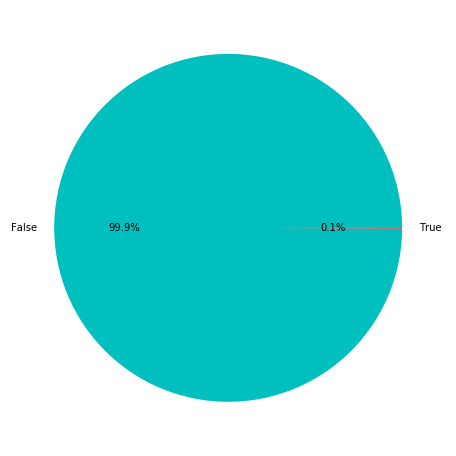

In [309]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(heavy_or_not['CDPHId'], labels=heavy_or_not['HeavyMetal'],autopct='%1.1f%%', colors=['c','r'])

In [636]:
#COMPANIES THAT REPORTED HEAVYMETAL
heavyprod_ = cdata[cdata['HeavyMetal']==True].groupby(['CompanyName']).count().sort_values(by = ['CDPHId'], ascending=False)
heavyprod = heavyprod_[['ProductName']]
heavyprod
#heavyprod_
##find tot product of each comp
##how likely the difference in proportion of products contain heavy metal to all products occur by random
##first find ration, if numbers get funny then categorize it better

,ProductName
CompanyName,
regiscorporation,14
vi-joninc,13
allurelabsinc,6
dermaquestinc,6
combeincorporated,5
harmonstoresinc,4
dermalogica,3
americaninternationalindustries,2
garcoalaboratoriesinc,2


In [356]:
heavycomp = cdata[cdata['HeavyMetal']==True][['CompanyName']].groupby(['CompanyName']).head()
heavycomp['CompanyName']
heavycomp_list = [c for c in heavycomp['CompanyName']]
heavycomp_list = list(set(heavycomp_list))
heavycomp_list

['combeincorporated',
 'americaninternationalindustries',
 'thekrogerco',
 'laboratoiresdecleor',
 'harmonstoresinc',
 'dermaquestinc',
 'regiscorporation',
 'vi-joninc',
 'dermalogica',
 'garcoalaboratoriesinc',
 'allurelabsinc']

In [632]:
#FIND # OF ALL PRODUCTS FOR EACH COMPANY THAT REPORT HEAVY METAL
#heavycomp = [c for cdata['CompanyName'] if cdata[cdata['HeavyMetal']== True]]
totprod = cdata.groupby(['CompanyName']).count()
totprod = totprod[['CDPHId']]
totprod
# totprod = totprod[totprod['CompanyName'].str.contains('|'.join(heavycomp_list))]
# totprod

,CDPHId
CompanyName,
2355644ontarioinc,1
accessbusinessgroupinternationalllc,138
acquadiparma,14
addedextrasllc,280
advancedaestheticsinc,3
...,...
zibabeauty,10
zoevagmbh,834
zoharcosmetics(mfo)ltd,16


In [381]:
#ratio = totprod[['CompanyName','CDPHId']]
#ratio.rename(columns = {'CDPHId':'TotalChemicalsReported'}, inplace = True) 

In [428]:
ratio = pd.concat([totprod, heavyprod], axis=1, join='inner')
ratio
ratio = ratio.rename(columns={'CDPHId':'Total Chemicals Reported','ProductName':'Heavy Metal Chemicals'})
ratio

,Total Chemicals Reported,Heavy Metal Chemicals
CompanyName,,
allurelabsinc,91,6
americaninternationalindustries,2020,2
combeincorporated,5,5
dermalogica,83,3
dermaquestinc,15,6
garcoalaboratoriesinc,7,2
harmonstoresinc,34,4
laboratoiresdecleor,21,2
regiscorporation,160,14


In [434]:
ratio['Proportion'] = ratio['Heavy Metal Chemicals']/ ratio['Total Chemicals Reported']
ratio

,Total Chemicals Reported,Heavy Metal Chemicals,Ratio,Proportion
CompanyName,,,,
allurelabsinc,91,6,6.593407,0.065934
americaninternationalindustries,2020,2,0.099010,0.000990
combeincorporated,5,5,100.000000,1.000000
dermalogica,83,3,3.614458,0.036145
dermaquestinc,15,6,40.000000,0.400000
garcoalaboratoriesinc,7,2,28.571429,0.285714
harmonstoresinc,34,4,11.764706,0.117647
laboratoiresdecleor,21,2,9.523810,0.095238
regiscorporation,160,14,8.750000,0.087500


In [451]:
ratio = ratio.reset_index()

ValueError: cannot insert level_0, already exists

Text(0.5, 1.0, 'Proportion of Heavy Metal to Total Reported Chemicals')

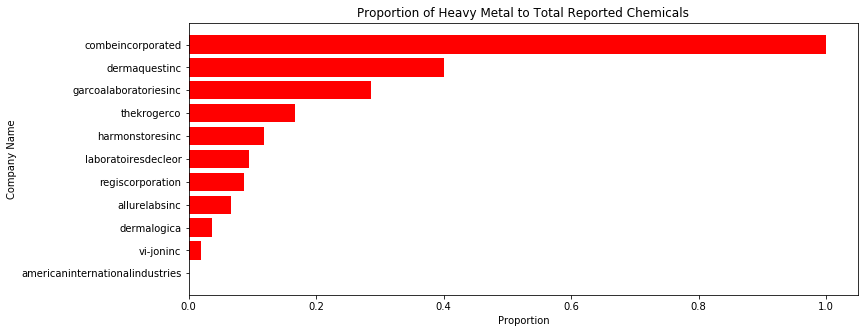

In [484]:
ratio = ratio.sort_values('Proportion')
fig, ax = plt.subplots(figsize = (12,5))
ax.barh(ratio['CompanyName'],ratio['Proportion'], color='red')
plt.xticks(rotation=0)
plt.xlabel('Proportion')
plt.ylabel('Company Name')
plt.title('Proportion of Heavy Metal to Total Reported Chemicals')

In [523]:
#Look into company with highest proportion
cdata[cdata['CompanyName']=='combeincorporated']

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal
7243,2370,grecian plus gradual haircolor foam,NaN,combeincorporated,Grecian Plus,32,Hair Coloring Products,Hair Tints and Rinses (coloring),lead acetate,1,2009-10-05,2009-10-05,NaT,2009-10-05,2009-10-05,NaT,False,True
7346,2377,grecian formula 16 liquid,NaN,combeincorporated,Grecian Formula 16,32,Hair Coloring Products,Hair Tints and Rinses (coloring),lead acetate,1,2009-10-05,2009-10-05,NaT,2009-10-05,2009-10-05,NaT,False,True
7386,2380,grecian formula 16 liquid,NaN,combeincorporated,Grecian Formula 16,32,Hair Coloring Products,Hair Tints and Rinses (coloring),lead acetate,1,2009-10-05,2009-10-05,NaT,2009-10-05,2009-10-05,NaT,False,True
7390,2383,grecian formula 16 cream,NaN,combeincorporated,Grecian Formula 16,32,Hair Coloring Products,Hair Tints and Rinses (coloring),lead acetate,1,2009-10-05,2009-10-05,NaT,2009-10-05,2009-10-05,NaT,False,True
92824,35553,grecian formula 16 liquid,NaN,combeincorporated,Grecian,32,Hair Coloring Products,Hair Dyes and Colors,lead acetate,1,2018-11-19,2018-11-19,2017-05-01,2018-11-19,2018-11-19,NaT,True,True


In [524]:
cdata[cdata['CompanyName']=='dermaquestinc']

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal
33410,11577,breathable coverage mineral foundation spf-30,Iron Oxide,dermaquestinc,Dermaminerals,106,Sun-Related Products,Sunscreen (making a cosmetic claim),titanium dioxide,4,2010-05-26,2010-12-30,NaT,2010-05-26,2010-05-26,NaT,False,False
33411,11577,breathable coverage mineral foundation spf-30,Iron Oxide,dermaquestinc,Dermaminerals,106,Sun-Related Products,Sunscreen (making a cosmetic claim),arsenic (inorganic oxides),4,2010-05-26,2010-12-30,NaT,2010-05-26,2010-05-26,NaT,False,True
33412,11577,breathable coverage mineral foundation spf-30,Iron Oxide,dermaquestinc,Dermaminerals,106,Sun-Related Products,Sunscreen (making a cosmetic claim),lead,4,2010-05-26,2010-12-30,NaT,2010-05-26,2010-05-26,NaT,False,True
33413,11577,breathable coverage mineral foundation spf-30,Iron Oxide,dermaquestinc,Dermaminerals,106,Sun-Related Products,Sunscreen (making a cosmetic claim),mercury and mercury compounds,4,2010-05-26,2010-12-30,NaT,2010-05-26,2010-05-26,NaT,False,True
33492,11651,post-skin resurfacing balm therapeutic care,NaN,dermaquestinc,Dermaquest Skin Therapy,90,Skin Care Products,Skin Moisturizers (making a cosmetic claim),titanium dioxide,4,2010-05-28,2010-05-28,NaT,2010-05-28,2010-05-28,NaT,False,False
33493,11651,post-skin resurfacing balm therapeutic care,NaN,dermaquestinc,Dermaquest Skin Therapy,90,Skin Care Products,Skin Moisturizers (making a cosmetic claim),arsenic (inorganic arsenic compounds),4,2010-05-28,2010-05-28,NaT,2010-05-28,2010-05-28,NaT,False,True
33494,11651,post-skin resurfacing balm therapeutic care,NaN,dermaquestinc,Dermaquest Skin Therapy,90,Skin Care Products,Skin Moisturizers (making a cosmetic claim),lead,4,2010-05-28,2010-05-28,NaT,2010-05-28,2010-05-28,NaT,False,True
33495,11651,post-skin resurfacing balm therapeutic care,NaN,dermaquestinc,Dermaquest Skin Therapy,90,Skin Care Products,Skin Moisturizers (making a cosmetic claim),mercury and mercury compounds,4,2010-05-28,2010-05-28,NaT,2010-05-28,2010-05-28,NaT,False,True
36548,12852,polishing facial scrub,NaN,dermaquestinc,Dermaquest Polishing Fac Scrub,6,Bath Products,Scrubs and Exfoliants,titanium dioxide,1,2010-06-21,2010-06-21,NaT,2010-06-21,2010-06-21,NaT,False,False
36552,12855,anti-aging mask,NaN,dermaquestinc,Dermaquest Anti-aging Mask,90,Skin Care Products,Facial Masks,titanium dioxide,1,2010-06-21,2010-06-21,NaT,2010-06-21,2010-06-21,NaT,False,False


In [504]:
#cdata[['CDPHId', 'CompanyName', 'ProductName', 'ChemicalName','HeavyMetal']].groupby(['CDPHId']).head()

In [521]:
##will come back to this 
# cdata[cdata['HeavyMetal']==True][['CDPHId','PrimaryCategory']].groupby('CDPHId').count()

In [525]:
#cgroup.sort_values(by=['CDPHId']).groupby(['CompanyName'])

In [247]:
#cgroup['CDPHId'] = cgroup['CDPHId'].astype('int')

In [526]:
#cgroup.dtypes

In [527]:
#cdata[cdata['HeavyMetal']==True].groupby(['CompanyName','CDPHId']).head()

In [522]:
#LOOKING INTO COMPANY WITH MOST REPORTED HEAVY METAL
cdata[cdata['CompanyName']=='regiscorporation']

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal
2542,847,slick whip,NaN,regiscorporation,Designline,18,Hair Care Products (non-coloring),Hair Styling Products,titanium dioxide,1,2009-09-14,2009-09-14,NaT,2009-09-14,2009-09-14,NaT,False,False
4524,1314,volumizing shampoo 12oz,NaN,regiscorporation,Costcutters,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),cocamide diethanolamine,1,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,False,False
4526,1316,volumizing shampoo 33.8oz.,NaN,regiscorporation,Costcutters,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),cocamide diethanolamine,1,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,False,False
4529,1319,moisturizing shampoo 12oz,NaN,regiscorporation,Costcutters,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),cocamide diethanolamine,1,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,False,False
4530,1320,moisturizing shampoo 33.8oz,NaN,regiscorporation,Costcutters,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),cocamide diethanolamine,1,2009-09-21,2009-09-21,NaT,2009-09-21,2009-09-21,NaT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59122,22214,moisturizing conditioner,NaN,regiscorporation,Regis Design Line,18,Hair Care Products (non-coloring),Hair Conditioners (rinse-out),"1,4-dioxane",5,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,False,False
59123,22214,moisturizing conditioner,NaN,regiscorporation,Regis Design Line,18,Hair Care Products (non-coloring),Hair Conditioners (rinse-out),arsenic (inorganic arsenic compounds),5,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,False,True
59124,22214,moisturizing conditioner,NaN,regiscorporation,Regis Design Line,18,Hair Care Products (non-coloring),Hair Conditioners (rinse-out),ethylene oxide,5,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,False,False
59125,22214,moisturizing conditioner,NaN,regiscorporation,Regis Design Line,18,Hair Care Products (non-coloring),Hair Conditioners (rinse-out),methanol,5,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,False,False


***cdata df has chemical remove date that we can create another boolean column based on it, True if removed, No if not***


In [627]:
#creating new column ChemRemoved
cdata['ChemRemoved'] = np.where(cdata['ChemicalDateRemoved'].isnull(),False,True)
cdata

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal,VeryHarmful,ChemRemoved
0,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True,False,False,False
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,False,False,True,False
2,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,False,False,False,False
3,4,precision glimmer eye liner-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,False,False,False,False
4,5,avon brilliant shine lip gloss-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107507,40659,revlon kiss sugar scrub sweet mint,NaN,revlonconsumerproductcorporation,Revlon,44,Makeup Products (non-permanent),Other Makeup Product,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False,False
107508,40660,revlon colorstay eyeliner gold,BLACK,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False,False
107509,40660,revlon colorstay eyeliner gold,BRONZE,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False,False
107510,40660,revlon colorstay eyeliner gold,SILVER,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False,False


In [630]:
#create new dataframe to drop rows that chemicals have been removed 
ccdata = cdata.drop(cdata[cdata.ChemRemoved == True].index)
ccdata

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal,VeryHarmful,ChemRemoved
0,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True,False,False,False
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,False,False,True,False
2,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,False,False,False,False
3,4,precision glimmer eye liner-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,False,False,False,False
4,5,avon brilliant shine lip gloss-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107507,40659,revlon kiss sugar scrub sweet mint,NaN,revlonconsumerproductcorporation,Revlon,44,Makeup Products (non-permanent),Other Makeup Product,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False,False
107508,40660,revlon colorstay eyeliner gold,BLACK,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False,False
107509,40660,revlon colorstay eyeliner gold,BRONZE,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False,False
107510,40660,revlon colorstay eyeliner gold,SILVER,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False,False


**VERY HARMFUL CHEMS**

In [603]:
##CREATING NEW COLUMN instead of HEAVY METAL I will take a look at other harmful ingredients as well
very_harmful = ['trade secret','lead', 'arsenic', 'mercury', 'cadmium', 'benzene', 'chromium', 'nickel', 'selenium','bha', 'bht', 'butylated hydroxyanisole', 'butylated hydroxytoluene', 'coal tar','dea', 'diethanolamine','tea', 'triethanolamine','dbp','formaldehyde','dmdm','diazolidinyl','imidazolidinyl','methenamine','quaternium-15', 'paraben', 'musk', 'moskene', 'peg', 'polyethylene','propylene glycol', 'ethoxylates', 'petrolatum','mineral oil', 'polycyclic', 'pah','siloxane', 'cyclomethicone', 'sodium laureth', 'sles', 'sls', 'sodium lauryl', 'triclosan']

In [604]:
#product contains very harmful chems
cdata[cdata['ChemicalName'].str.contains('|'.join(very_harmful))]

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,False,False
31,24,white premium lotion soap,NaN,gojoindustriesinc,GOJO�,74,Personal Care Products,Hand Cleansers and Sanitizers,cocamide diethanolamine,0,2009-07-23,2012-02-07,NaT,2009-07-23,2012-02-07,2010-12-30,False,False
49,43,skin prep scrub,NaN,dermalogica,Dermalogica,6,Bath Products,Scrubs and Exfoliants,cocamide diethanolamine,2,2009-08-21,2009-08-21,NaT,2009-08-21,2009-08-21,NaT,False,False
62,45,enzymatic sea mud - professional only,NaN,dermalogica,Dermalogica,6,Bath Products,Scrubs and Exfoliants,chromium (hexavalent compounds),1,2009-08-24,2009-08-24,NaT,2009-08-24,2009-08-24,NaT,False,True
310,156,a&c synergy serum,NaN,physician'scarealliancellc,PCA Skin,90,Skin Care Products,Skin Astringent (making a cosmetic claim),butylated hydroxyanisole,3,2009-08-28,2018-01-24,NaT,2018-01-24,2018-01-24,NaT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107380,40625,holiday liquid lipstick set (shade chrome shadow),NaN,anastasiabeverlyhillsllc,Anastasia Beverly Hills,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils","mineral oils, untreated and mildly treated",2,2019-12-11,2019-12-11,NaT,2019-12-11,2019-12-11,NaT,False,False
107382,40626,holiday liquid lipstick set (shade chrome olive),NaN,anastasiabeverlyhillsllc,Anastasia Beverly Hills,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils","mineral oils, untreated and mildly treated",2,2019-12-11,2019-12-11,NaT,2019-12-11,2019-12-11,NaT,False,False
107383,40627,holiday liquid lipstick set (shade chrome burg...,NaN,anastasiabeverlyhillsllc,Anastasia Beverly Hills,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils","mineral oils, untreated and mildly treated",1,2019-12-11,2019-12-11,NaT,2019-12-11,2019-12-11,NaT,False,False
107385,40628,holiday liquid lipstick set (shade chrome bronze),NaN,anastasiabeverlyhillsllc,Anastasia Beverly Hills,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils","mineral oils, untreated and mildly treated",2,2019-12-11,2019-12-11,NaT,2019-12-11,2019-12-11,NaT,False,False


In [631]:
#product contains very harmful chems for sure (never been removed)
ccdata[ccdata['ChemicalName'].str.contains('|'.join(very_harmful))]

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal,VeryHarmful,ChemRemoved
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,False,False,True,False
49,43,skin prep scrub,NaN,dermalogica,Dermalogica,6,Bath Products,Scrubs and Exfoliants,cocamide diethanolamine,2,2009-08-21,2009-08-21,NaT,2009-08-21,2009-08-21,NaT,False,False,True,False
62,45,enzymatic sea mud - professional only,NaN,dermalogica,Dermalogica,6,Bath Products,Scrubs and Exfoliants,chromium (hexavalent compounds),1,2009-08-24,2009-08-24,NaT,2009-08-24,2009-08-24,NaT,False,True,True,False
310,156,a&c synergy serum,NaN,physician'scarealliancellc,PCA Skin,90,Skin Care Products,Skin Astringent (making a cosmetic claim),butylated hydroxyanisole,3,2009-08-28,2018-01-24,NaT,2018-01-24,2018-01-24,NaT,False,False,True,False
313,156,a&c synergy serum,NaN,physician'scarealliancellc,PCA Skin,90,Skin Care Products,Skin Bleaching (making a cosmetic claim),butylated hydroxyanisole,3,2009-08-28,2018-01-24,NaT,2018-01-24,2018-01-24,NaT,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107380,40625,holiday liquid lipstick set (shade chrome shadow),NaN,anastasiabeverlyhillsllc,Anastasia Beverly Hills,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils","mineral oils, untreated and mildly treated",2,2019-12-11,2019-12-11,NaT,2019-12-11,2019-12-11,NaT,False,False,True,False
107382,40626,holiday liquid lipstick set (shade chrome olive),NaN,anastasiabeverlyhillsllc,Anastasia Beverly Hills,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils","mineral oils, untreated and mildly treated",2,2019-12-11,2019-12-11,NaT,2019-12-11,2019-12-11,NaT,False,False,True,False
107383,40627,holiday liquid lipstick set (shade chrome burg...,NaN,anastasiabeverlyhillsllc,Anastasia Beverly Hills,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils","mineral oils, untreated and mildly treated",1,2019-12-11,2019-12-11,NaT,2019-12-11,2019-12-11,NaT,False,False,True,False
107385,40628,holiday liquid lipstick set (shade chrome bronze),NaN,anastasiabeverlyhillsllc,Anastasia Beverly Hills,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils","mineral oils, untreated and mildly treated",2,2019-12-11,2019-12-11,NaT,2019-12-11,2019-12-11,NaT,False,False,True,False


In [605]:
cdata['VeryHarmful'] = cdata['ChemicalName'].str.contains('|'.join(very_harmful))
cdata

,CDPHId,ProductName,CSF,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategory,ChemicalName,ChemicalCount,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,Discontinued,HeavyMetal,VeryHarmful
0,2,ultra color rich extra plump lipstick-all shades,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils",titanium dioxide,1,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True,False,False
1,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),distillates (coal tar),2,2009-07-01,2009-07-01,NaT,2009-07-01,2009-07-01,NaT,False,False,True
2,3,glover's medicated shampoo,NaN,jstrickland&co,Glover's,18,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim),estragole,2,2009-07-01,2009-07-01,NaT,2009-07-02,2009-07-02,NaT,False,False,False
3,4,precision glimmer eye liner-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2009-07-09,2013-08-28,NaT,2009-07-09,2009-07-09,NaT,False,False,False
4,5,avon brilliant shine lip gloss-all shades �,NaN,newavonllc,AVON,44,Makeup Products (non-permanent),Lip Gloss/Shine,titanium dioxide,1,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,NaT,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107507,40659,revlon kiss sugar scrub sweet mint,NaN,revlonconsumerproductcorporation,Revlon,44,Makeup Products (non-permanent),Other Makeup Product,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False
107508,40660,revlon colorstay eyeliner gold,BLACK,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False
107509,40660,revlon colorstay eyeliner gold,BRONZE,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False
107510,40660,revlon colorstay eyeliner gold,SILVER,revlonconsumerproductcorporation,Revlon Colorstay,44,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,titanium dioxide,1,2019-12-16,2019-12-16,NaT,2019-12-16,2019-12-16,NaT,False,False,False


In [607]:
#companies report these very harmful chems
harmful = cdata[cdata['VeryHarmful']==True].groupby(['CompanyName']).count().sort_values(by = ['CDPHId'], ascending=False)
harmful[['ProductName']]

,ProductName
CompanyName,
nyxlosangelesinc,551
farouksystemsinc,263
demeterfragrancelibraryinc,245
greenbrierinternationalinc,171
maesallc,166
...,...
fantasiaindustries,1
rowparpharmaceuticalsinc,1
sanjoaquinsupply,1


In [615]:
harmfulcomp = cdata[cdata['VeryHarmful']==True][['CompanyName']].groupby(['CompanyName']).head()
harmfulcomp[['CompanyName']]

,CompanyName
1,jstrickland&co
31,gojoindustriesinc
49,dermalogica
62,dermalogica
310,physician'scarealliancellc
...,...
104039,oceanausainc
104040,oceanausainc
106442,oceanausainc
106443,oceanausainc


In [621]:
harmfulcomp_list = [c for c in harmfulcomp['CompanyName']]
harmfulcomp_list = list(set(heavycomp_list))
harmfulcomp_list

['combeincorporated',
 'americaninternationalindustries',
 'thekrogerco',
 'harmonstoresinc',
 'dermaquestinc',
 'dermalogica',
 'regiscorporation',
 'vi-joninc',
 'laboratoiresdecleor',
 'garcoalaboratoriesinc',
 'allurelabsinc']

In [640]:
harmfulprod_ = ccdata[ccdata['VeryHarmful']==True].groupby(['CompanyName']).count().sort_values(by = ['CDPHId'], ascending=False)
harmfulprod = harmfulprod_[['ProductName']]
harmfulprod

,ProductName
CompanyName,
nyxlosangelesinc,550
farouksystemsinc,261
demeterfragrancelibraryinc,245
greenbrierinternationalinc,168
maesallc,166
...,...
pearlosophyusallc,1
houseofcheatham,1
colgate-palmolivecompany,1


In [638]:
totprod

,CDPHId
CompanyName,
2355644ontarioinc,1
accessbusinessgroupinternationalllc,138
acquadiparma,14
addedextrasllc,280
advancedaestheticsinc,3
...,...
zibabeauty,10
zoevagmbh,834
zoharcosmetics(mfo)ltd,16


In [641]:
ratio = pd.concat([totprod, harmfulprod], axis=1, join='inner')
ratio = ratio.rename(columns={'CDPHId':'Total Chemicals Reported','ProductName':'Very Harmful Chemicals'})
ratio

,Total Chemicals Reported,Very Harmful Chemicals
CompanyName,,
acquadiparma,14,4
addedextrasllc,280,14
afflink,8,6
agprofessionalhaircareproductsltd,4,4
albertoculver,15,6
...,...,...
wwgraingerinc,3,2
yiwuariscosmeticmanufactory,8,4
youngnailsinc,66,8


In [643]:
ratio['Proportion'] = ratio['Very Harmful Chemicals']/ ratio['Total Chemicals Reported']
ratio

,Total Chemicals Reported,Very Harmful Chemicals,Proportion
CompanyName,,,
acquadiparma,14,4,0.285714
addedextrasllc,280,14,0.050000
afflink,8,6,0.750000
agprofessionalhaircareproductsltd,4,4,1.000000
albertoculver,15,6,0.400000
...,...,...,...
wwgraingerinc,3,2,0.666667
yiwuariscosmeticmanufactory,8,4,0.500000
youngnailsinc,66,8,0.121212


Text(0.5, 1.0, 'Proportion of Very Harmful Chemicals to Total Reported Chemicals')

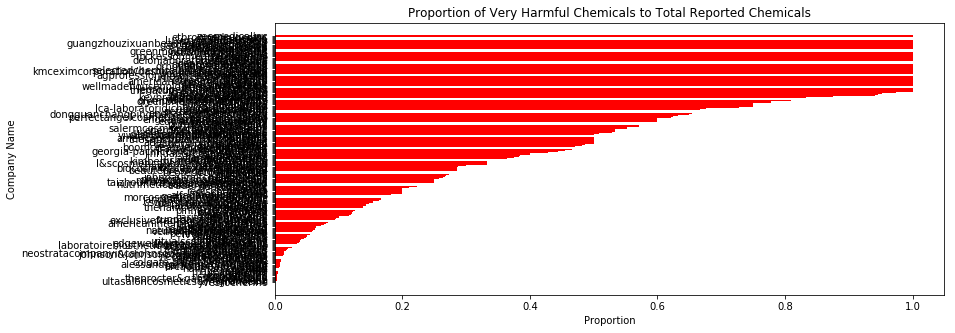

In [644]:
ratio = ratio.reset_index()
ratio = ratio.sort_values('Proportion')
fig, ax = plt.subplots(figsize = (12,5))
ax.barh(ratio['CompanyName'],ratio['Proportion'], color='red')
plt.xticks(rotation=0)
plt.xlabel('Proportion')
plt.ylabel('Company Name')
plt.title('Proportion of Very Harmful Chemicals to Total Reported Chemicals')

In [646]:
harmful_or_not = ccdata.groupby(['VeryHarmful']).count()[['CDPHId']].reset_index()
harmful_or_not

,VeryHarmful,CDPHId
0,False,93789
1,True,4008


([<matplotlib.patches.Wedge at 0x13cab3d30>,
 [Text(-1.0908952805928926, 0.14123557193623051, 'False'),
  Text(1.0908952855516778, -0.1412355336348607, 'True')],
 [Text(-0.595033789414305, 0.07703758469248936, '95.9%'),
  Text(0.5950337921190969, -0.07703756380083308, '4.1%')])

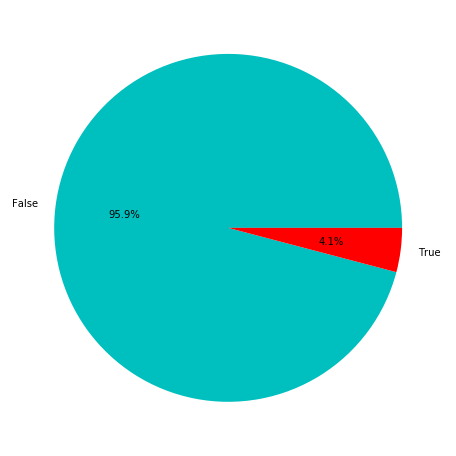

In [650]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(harmful_or_not['CDPHId'], labels=harmful_or_not['VeryHarmful'],autopct='%1.1f%%', colors=['c','r'])

Hypothesis ideas
1. Is there a stitistical significant difference in harmful chemical to all chemical reported ratio between 2 companies
- can we determine product with chemical name listed as trade secret are heavy metal or non heavy metal
- parameter that heavy metal chemicals
- how many percent can we be confident that the product without heavy metal chemicals 

**Knowing that approx 12.5% of the products were discontinued as of 2019, and 4.1% of all reported chemicals were VERY HARMFUL
if you were to buy one of the product in CA year, how confidence can you be that you did not buy the products containing very harmful chemical

In [ ]:
#we'll categorize all heavy metal/ non heavy metal